###  Figures

author: Sebastian Noe, snoe@geophysik.uni-muenchen.de

This notebook creates most of the figures that will appear in either the master thesis or the paper. 
Various functions are imported from "functions_anisotropy.py". Further explanations about functions can be found collectively there.

Remark: To speed calculations up, most plots are created with less data than necessary, i.e. less directions, less inversions per standard deviation calculation, less synthetic media. For paper-relevant figures, those numbers are increased significantly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import gridspec
from functions_anisotropy import *

In [2]:
medium = load_medium_list()
rmed = load_random_medium_list()

#0 isotropic
#1 taylor sandstone
#2 mesaverde clayshale
#3 mesaverde laminated siltstone
#4 mesaverde mudshale
#5 mesaverde calcareous sandstone
#6 quartz
#7 Baird-shale
 
#0 isotropic
#1 cubic
#2 VTI
#3 tetragonal
#4 trigonal
#5 orthorhombic
#6 monoclinic
#7 triclinic


In [3]:
#C, density = get_specific_VTI(medium[1])
C, density = get_random_C(rmed[7],20)
ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

triclinic
[[492.09  282.264 297.813 119.135  95.47   83.827]
 [282.264 781.47  413.61   85.455 105.742 104.919]
 [297.813 413.61  556.134 107.02  124.7   109.326]
 [119.135  85.455 107.02  164.134 113.701  97.63 ]
 [ 95.47  105.742 124.7   113.701 253.936  70.387]
 [ 83.827 104.919 109.326  97.63   70.387 188.376]]


### Visualization of translational and rotational polarizations in an anisotropic medium

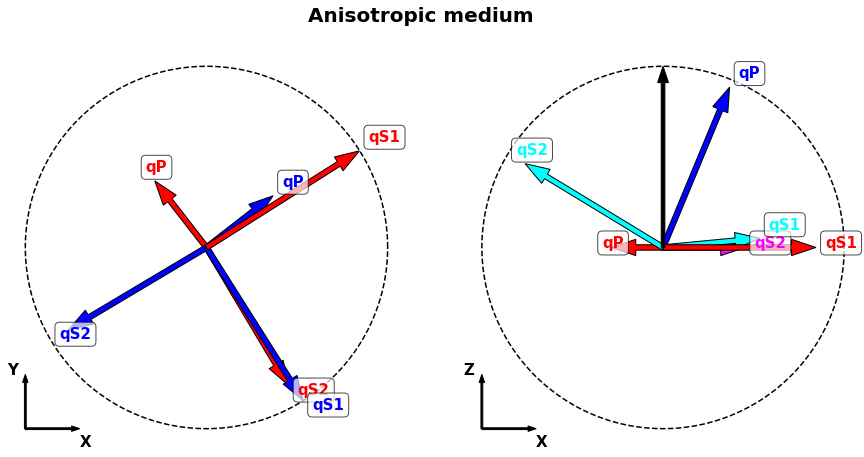

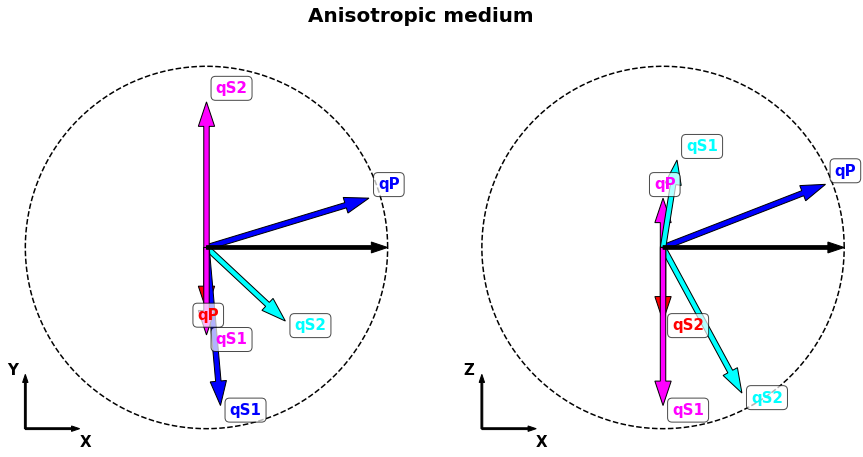

In [4]:
N = 2
rot = True
thetax = np.linspace(0.,np.pi/2,N)
phix = 0.
nus = np.zeros((len(thetax),3))
for idir in range(len(thetax)):
    nus[idir,0] = np.sin(thetax[idir])*np.cos(phix)
    nus[idir,1] = np.sin(thetax[idir])*np.sin(phix)
    nus[idir,2] = np.cos(thetax[idir])
    
Nplots = 1000
ang = np.linspace(0.,2*np.pi,Nplots)
x = np.cos(ang)
y = np.sin(ang)
gammas = get_gamma(nus,C)

props = dict(boxstyle='round', facecolor='white',edgecolor='k', alpha=0.7)

for i in range(len(thetax)):
    vel,v = get_eigenvals(gammas[i],density)
    fig, ax = plt.subplots(ncols=2,figsize=(15,7))
    fig.suptitle('Anisotropic medium',weight='bold',fontsize=20)

    for j in range(3):
        if j == np.argmax(vel):
            label = 'qP'
        elif j==np.argmin(vel):
            label = 'qS1'
        else:
            label = 'qS2'
        
        if np.dot(v[:,j],nus[i,:])<0.:
            v[:,j] *= -1.
        if v[2,j]<-0.01:
            fc = 'cyan'
        else:
            fc = 'blue'
        if abs(v[0,j])>0.01 or abs(v[1,j])>0.01:
            ax[0].arrow(0.,0.,v[0,j],v[1,j],width=0.03,facecolor=fc,length_includes_head=True)
            ax[0].text(v[0,j]+0.05*np.sign(v[0,j]),v[1,j]+0.05*np.sign(v[1,j]),label,fontsize=15,weight='bold',c=fc,bbox=props)
        if v[1,j]<-0.01:
            fc = 'cyan'
        else:
            fc = 'blue'
        if abs(v[0,j])>0.01 or abs(v[2,j])>0.01:
            ax[1].arrow(0.,0.,v[0,j],v[2,j],width=0.03,facecolor=fc,length_includes_head=True)
            ax[1].text(v[0,j]+0.05*np.sign(v[0,j]),v[2,j]+0.05*np.sign(v[2,j]),label,fontsize=15,weight='bold',c=fc,bbox=props)
        if rot:    
            r = np.cross(nus[i],v[:,j])
            if r[2]<-0.01:
                fc = 'magenta'
            else:
                fc = 'red'
            if abs(r[0])>0.01 or abs(r[1])>0.01:     
                ax[0].arrow(0.,0.,r[0],r[1],width=0.03,facecolor=fc,length_includes_head=True)
                ax[0].text(r[0]+0.05*np.sign(r[0]),r[1]+0.05*np.sign(r[1]),label,fontsize=15,weight='bold',c=fc,bbox=props)
            if r[1]<-0.01:
                fc = 'magenta'
            else:
                fc = 'red'
            if abs(r[0])>0.01 or abs(r[2])>0.01:    
                ax[1].arrow(0.,0.,r[0],r[2],width=0.03,facecolor=fc,length_includes_head=True)
                ax[1].text(r[0]+0.05*np.sign(r[0]),r[2]+0.05*np.sign(r[2]),label,fontsize=15,weight='bold',c=fc,bbox=props)
    ax[0].arrow(0.,0.,nus[i,0],nus[i,1],width=0.02,facecolor='k',length_includes_head=True)    
    ax[1].arrow(0.,0.,nus[i,0],nus[i,2],width=0.02,facecolor='k',length_includes_head=True)
    
    for j in range(2):
        ax[j].set_xlim([-1.05,1.05])
        ax[j].set_ylim([-1.05,1.05])
        ax[j].plot(x,y,c='k',ls='dashed')
        ax[j].set_axis_off()
        ax[j].arrow(-1,-1,0.3,0,fc='k',length_includes_head=True,width=0.01)
        ax[j].arrow(-1,-1,0.,0.3,fc='k',length_includes_head=True,width=0.01)
        ax[j].text(-0.7,-1.1,'X',fontsize=15,weight='bold')
    ax[0].text(-1.1,-0.7,'Y',fontsize=15,weight='bold') 
    ax[1].text(-1.1,-0.7,'Z',fontsize=15,weight='bold')
    #plt.savefig('Polarizations_prop_figure_angle_'+str(round(thetax[i]*180/np.pi,0))+'.png')
    plt.show()

#### Analytical solutions of the Christoffel equations
##### 1. Shear-wave splitting as a function of incident angle

isotropic
[[75. 25. 25.  0.  0.  0.]
 [25. 75. 25.  0.  0.  0.]
 [25. 25. 75.  0.  0.  0.]
 [ 0.  0.  0. 25.  0.  0.]
 [ 0.  0.  0.  0. 25.  0.]
 [ 0.  0.  0.  0.  0. 25.]]
taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]
mesaverde clayshale
[[66.65592638 19.62409696 39.41870344  0.          0.          0.        ]
 [19.62409696 66.65592638 39.41870344  0.          0.          0.        ]
 [39.41870344 39.41870344 39.96158656  0.          0.          0.        ]
 [ 0.          0.          0.         10.93763475  0.          0.        ]
 [ 0.          0.          0.          

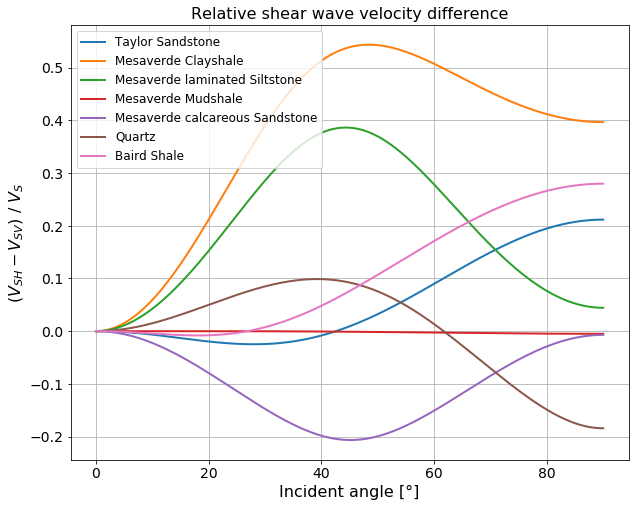

In [5]:
N = 360
thetax = np.linspace(0.,np.pi/2,N)
nus = np.zeros((N,3))
for idir in range(N):
    nus[idir,0] = np.sin(thetax[idir])
    nus[idir,2] = np.cos(thetax[idir])

splitting = np.zeros((len(medium),N))
## positive if SH is quicker, negative it is SV
for i in range(len(medium)):
    C, density = get_specific_VTI(medium[i])
    gammas = get_gamma(nus,C)
    for idir in range(N):
        vel,v = get_eigenvals(gammas[idir], density)
        if abs(v[1,np.argmin(vel)]) > v[0,np.argmin(vel)]**2+v[2,np.argmin(vel)]**2: # identify SH
            V_S = np.sqrt((2*np.median(vel)**2+min(vel)**2)/3.)
            splitting[i,idir] = (min(vel) - np.median(vel))/V_S
        else:
            V_S = np.sqrt((2*min(vel)**2+np.median(vel)**2)/3.)
            splitting[i,idir] = (np.median(vel)-min(vel))/V_S 

labels = ['Isotropic',
 'Taylor Sandstone',
 'Mesaverde Clayshale',
 'Mesaverde laminated Siltstone',
 'Mesaverde Mudshale',
 'Mesaverde calcareous Sandstone',
 'Quartz',
 'Baird Shale']
plt.figure(figsize=(10,8))
for i in range(1,len(medium)):
    plt.plot(thetax*180/np.pi,splitting[i,:],label=labels[i],lw=2)
plt.xlabel('Incident angle [°]',fontsize=16) 
plt.ylabel('$(V_{SH}-V_{SV})~/~V_S$',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.title('Relative shear wave velocity difference',fontsize=16)
#plt.savefig('Shearwavesplitting.png')
plt.show()

##### 2. qP-polarization deviation from propagation direction as a function of incident angle

isotropic
[[75. 25. 25.  0.  0.  0.]
 [25. 75. 25.  0.  0.  0.]
 [25. 25. 75.  0.  0.  0.]
 [ 0.  0.  0. 25.  0.  0.]
 [ 0.  0.  0.  0. 25.  0.]
 [ 0.  0.  0.  0.  0. 25.]]
taylor sandstone

C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app



[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]
mesaverde clayshale
[[66.65592638 19.62409696 39.41870344  0.          0.          0.        ]
 [19.62409696 66.65592638 39.41870344  0.          0.          0.        ]
 [39.41870344 39.41870344 39.96158656  0.          0.          0.        ]
 [ 0.          0.          0.         10.93763475  0.          0.        ]
 [ 0.          0.          0.          0.         10.93763475  0.        ]
 [ 0.          0.          0.          0.          0.         23.51591471]]
mesaverde laminated siltstone
[[60.1278135  22.62128644 38.25576711  0.      

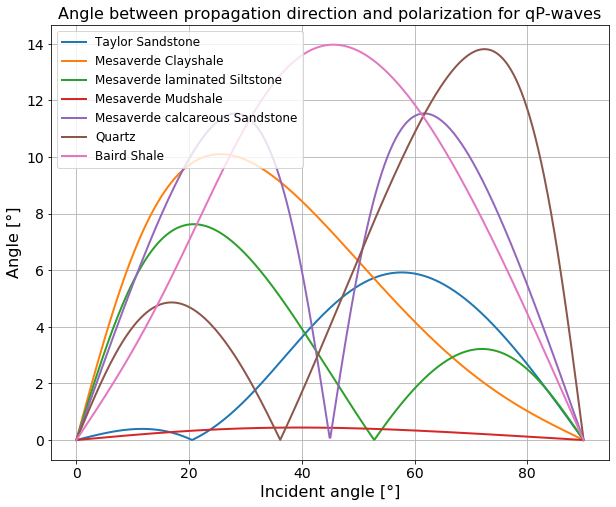

In [6]:
N = 720
f = 15.
thetax = np.linspace(0.,np.pi/2,N)
nus = np.zeros((N,3))
for idir in range(N):
    nus[idir,0] = np.sin(thetax[idir])
    nus[idir,2] = np.cos(thetax[idir])

curlamp = np.zeros((len(medium),N))
for i in range(len(medium)):
    C, density = get_specific_VTI(medium[i])
    gammas = get_gamma(nus,C)
    for idir in range(N):
        vel,v = get_eigenvals(gammas[idir], density)
        alpha = np.arccos(np.dot(v[:,np.argmax(vel)],nus[idir,:]))
        if alpha >np.pi/2:
            alpha = np.pi-alpha
        curlamp[i,idir] = alpha*180/np.pi #/max(vel)

#norm = np.max(curlamp[1:,:])
labels = ['Isotropic',
 'Taylor Sandstone',
 'Mesaverde Clayshale',
 'Mesaverde laminated Siltstone',
 'Mesaverde Mudshale',
 'Mesaverde calcareous Sandstone',
 'Quartz',
 'Baird Shale']
plt.figure(figsize=(10,8))
for i in range(1,len(medium)):
    plt.plot(thetax*180/np.pi,curlamp[i,:], label=labels[i],lw=2)
plt.xlabel('Incident angle [°]',fontsize=16) 
plt.ylabel('Angle [°]',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid()
plt.legend(fontsize=12,loc=2)
plt.title('Angle between propagation direction and polarization for qP-waves',fontsize=16)
#plt.savefig('Curlamplitude.png')
plt.show()

#### Example measurement

In [7]:
C, density = get_specific_VTI(medium[6])
#C, density = get_random_C(rmed[7],20)
ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

quartz
[[79.5695957   6.99073743 13.74513146  0.          0.          0.        ]
 [ 6.99073743 79.5695957  13.74513146  0.          0.          0.        ]
 [13.74513146 13.74513146 98.4772224   0.          0.          0.        ]
 [ 0.          0.          0.         53.21030665  0.          0.        ]
 [ 0.          0.          0.          0.         53.21030665  0.        ]
 [ 0.          0.          0.          0.          0.         36.28942914]]


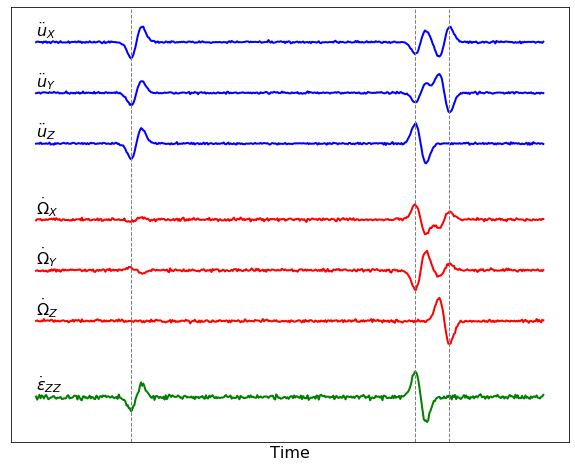

In [8]:
f = 15.
fs = 100.
SNR_dB_u = 15.
SNR_dB_r = 10.
SNR_dB_s = 10.
showarrivalpicks = True
thetax = np.array([65.*np.pi/180])
phix = 0.
Ndir = len(thetax)
nus = np.zeros((Ndir,3))
for idir in range(Ndir):
    phix = np.random.randint(0,360)*np.pi/180
    nus[idir,0] = np.sin(thetax[idir])*np.cos(phix)
    nus[idir,1] = np.sin(thetax[idir])*np.sin(phix)
    nus[idir,2] = np.cos(thetax[idir])
    
gammas = get_gamma(nus,C)    
for i in range(Ndir):
    vel,v = get_eigenvals(gammas[i], density)
    seis, t = get_seis_strain(v, vel, nus[i], f, fs)
    seis = make_some_noise(seis,SNR_dB_u,SNR_dB_r,SNR_dB_s=SNR_dB_s)
    seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
    nt = len(seis[0,:])
    
    ip,is1,is2 = pick_arrivals(seis,f,fs)
    N1 = ip - nt//10
    N2 = is2 + nt//10
    
    fig,ax = plt.subplots(nrows=1,figsize=(10,8),sharex=True)
    a0 = np.max(np.sqrt(seis[0,:]**2+seis[1,:]**2+seis[2,:]**2))
    a1 = np.max(np.sqrt(seis[3,:]**2+seis[4,:]**2+seis[5,:]**2))
    a2 = np.max(np.sqrt(seis[6,:]**2))
    rf = a0/a1
    rs = a0/a2
    ax.set_yticks([])
    ax.plot(t[N1:N2],seis[0,N1:N2],c='b',lw=2)
    ax.plot(t[N1:N2],seis[1,N1:N2]-2*a0,c='b',lw=2)
    ax.plot(t[N1:N2],seis[2,N1:N2]-4*a0,c='b',lw=2)
    ax.plot(t[N1:N2],seis[3,N1:N2]*rf-7*a0,c='r',lw=2)
    ax.plot(t[N1:N2],seis[4,N1:N2]*rf-9*a0,c='r',lw=2)
    ax.plot(t[N1:N2],seis[5,N1:N2]*rf-11*a0,c='r',lw=2)
    ax.plot(t[N1:N2],seis[6,N1:N2]*rs-14*a0,c='g',lw=2)
    
    ax.text(t[N1],seis[0,N1]+a0/4,'$\ddot u_X$',fontsize=16)
    ax.text(t[N1],seis[1,N1]-2*a0+a0/4,'$\ddot u_Y$',fontsize=16)
    ax.text(t[N1],seis[2,N1]-4*a0+a0/4,'$\ddot u_Z$',fontsize=16)
    ax.text(t[N1],seis[3,N1]*rf-7*a0+a0/4,'$\dot\Omega_X$',fontsize=16)
    ax.text(t[N1],seis[4,N1]*rf-9*a0+a0/4,'$\dot\Omega_Y$',fontsize=16)
    ax.text(t[N1],seis[5,N1]*rf-11*a0+a0/4,'$\dot\Omega_Z$',fontsize=16)
    ax.text(t[N1],seis[6,N1]*rs-14*a0+a0/4,'$\dot\epsilon_{ZZ}$',fontsize=16)
    ax.tick_params(labelsize=16)
    ax.set_xticks([])
    ax.set_xlabel('Time',fontsize=16)
    if showarrivalpicks:
        ax.axvline(t[ip],lw=1,ls='dashed',c='0.5')
        ax.axvline(t[is1],lw=1,ls='dashed',c='0.5')
        ax.axvline(t[is2],lw=1,ls='dashed',c='0.5')
    #plt.savefig('Seismogram_example_quartz_65.png')
    plt.show()

#### Expected angular error of polarization determination

In [9]:
C, density = get_specific_VTI(medium[1])
#C, density = get_random_C(rmed[7],20)
ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [10]:
fs = 100.
f = 15.
Ndb = 10
SNR_dB_u = np.linspace(0,50,Ndb)
SNR_dB_r = np.linspace(0,50,Ndb)

Nest = 10
N = 10
thetax = np.linspace(0.,np.pi/2,N)
nus = np.zeros((N,3))
for idir in range(N):
    nus[idir,0] = np.sin(thetax[idir])
    nus[idir,2] = np.cos(thetax[idir])
gammas = get_gamma(nus,C)    
ests = []
for i in range(0,N):
    print(i+1)
    vel,v = get_eigenvals(gammas[i], density)
    plots = [[],[],[]]
    for ii in range(Ndb):
        bins = [[],[],[]]
        l1 = np.argmax(vel)
        l3 = np.argmin(vel)
        for k in range(3):
            if k!=l1 and k!=l3:
                l2 = k
        eigv = np.array([v[:,l1],v[:,l2],v[:,l3]])
        for k in range(3):
            if eigv[k,2]<0:
                eigv[k] *= -1

        for j in range(0,Nest):
            seis, t = get_seis(v, vel, nus[i], f, fs)
            seis = make_some_noise(seis,SNR_dB_u[ii],SNR_dB_r[ii])
            n = get_polarizations(seis,'nav')     
            n = np.array(n)  
            alpha = np.zeros(3)
            for k in range(3):
                alpha[k] = np.arccos(np.dot(n[k],eigv[k]))*180/np.pi
                if alpha[k] > 90.:
                    alpha[k] = abs(180.-alpha[k])
                bins[k].append(alpha[k])

        for l in range(3):
            plots[l].append(np.mean(bins[l])) 
    ests.append(plots) 

1
2
3
4
5
6
7
8
9
10


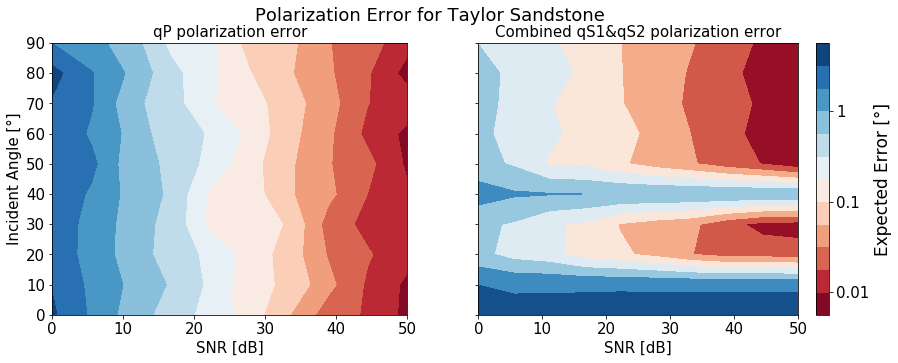

In [11]:
i1,i2,i3 = np.shape(ests)
ests2 = np.zeros((i1,i2,i3))
for i in range(i1):
    for j in range(i2):
        for k in range(i3):
            ests2[i,j,k] = np.log10(ests[i][j][k])  
    
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,5),sharex=True,sharey=True)
cs1 = ax[0].contourf(SNR_dB_u,thetax*180/np.pi,ests2[:,0,:],10,cmap='RdBu')
cs2 = ax[1].contourf(SNR_dB_u,thetax*180/np.pi,ests2[:,1,:],cmap='RdBu' )
#cs2 = ax[1].contourf(SNR_dB_u,thetax*180/np.pi,np.sqrt(ests2[:,1,:]**2+ests2[:,2,:]**2),cmap='RdBu' )
cb = fig.colorbar(cs1,ax=ax[1], orientation='vertical', fraction=0.05, norm=matplotlib.colors.LogNorm())
cb.set_label(label='Expected Error [°]',fontsize=17)
cb.set_ticks([-2,-1,0,1])
cb.set_ticklabels(['0.01','0.1','1','10'])
cb.ax.tick_params(labelsize=15)
ax[0].set_ylabel('Incident Angle [°]',fontsize=15)
ax[0].set_xlabel('SNR [dB]',fontsize=15)
ax[1].set_xlabel('SNR [dB]',fontsize=15)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
fig.suptitle('Polarization Error for Taylor Sandstone',fontsize=18)
ax[0].set_title('qP polarization error',fontsize=15)
ax[1].set_title('Combined qS1&qS2 polarization error',fontsize=15)
#plt.savefig('Polarization_error_taylor_sandstone_2d.png')
plt.show()

#### Propagation direction estimation with polarization of rotational components

In [12]:
C, density = get_specific_VTI(medium[1])

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [13]:
f = 15.
fs = 100.
Ndb = 10
Ninv = 10
SNR_dB_u = np.linspace(-10.,60.,Ndb)
SNR_dB_r = np.linspace(-10.,60.,Ndb)
N = 10
turnoffp = True
thetax = np.linspace(0.,90.,N)*np.pi/180.
nus = np.zeros((len(thetax),3))
for idir in range(len(thetax)):
    phix = np.random.randint(0,360) * np.pi/180
    nus[idir,0] = np.sin(thetax[idir])*np.cos(phix)
    nus[idir,1] = np.sin(thetax[idir])*np.sin(phix)
    nus[idir,2] = np.cos(thetax[idir])

gammas = get_gamma(nus,C)
ests = np.zeros((len(thetax),Ndb,Ninv,2))
for i in range(len(thetax)):
    vel,v = get_eigenvals(gammas[i],density)
    for idb in range(Ndb):
        for j in range(Ninv):
            seis, t = get_seis(v, vel, nus[i], f, fs)
            seis = make_some_noise(seis,SNR_dB_u[idb],SNR_dB_r[idb])
            nu_e = get_propagation_direction(seis,f,fs,turnoffp=turnoffp)
            alpha = np.arccos(np.dot(nu_e,nus[i]))*180./np.pi
            if alpha>90.:
                alpha = 180.-alpha
            ests[i,idb,j,0] = alpha 
            nu_e2 = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=turnoffp)
            if type(nu_e2)==bool:
                n = get_polarizations(seis,'nav')
                nu_e2 = n[0] 
            alpha = np.arccos(np.dot(nus[i],nu_e2))*180/np.pi 
            if alpha>90.:
                alpha = 180.-alpha
            ests[i,idb,j,1] = alpha    
            
    print(i+1)

1
2
3
4
5
6
7
8
9
10


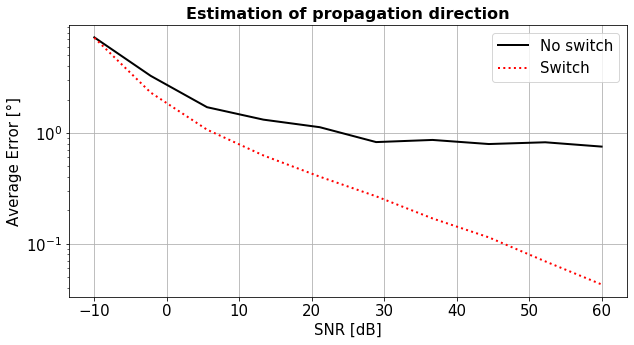

In [14]:
sig = np.zeros((len(thetax),Ndb,2))
for i in range(len(thetax)):
    for j in range(Ndb):
        for k in range(2):
            sig[i,j,k] = np.sqrt(np.mean(ests[i,j,:,k]))

## only shows average for all incident angles. Plot depending on incident angle can be found below
d = np.zeros((2,Ndb))
for j in range(2):
    for i in range(Ndb):
        d[j,i] = np.mean(sig[:,i,j])
        
plt.figure(figsize=(10,5))    
plt.plot(SNR_dB_r,d[0],lw=2,ls='solid',c='k',label='No switch')  
plt.plot(SNR_dB_r,d[1],lw=2,ls='dotted',c='r',label='Switch')
plt.yscale('log')    
plt.title('Estimation of propagation direction',weight='bold',fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('SNR [dB]',fontsize=15)
plt.ylabel('Average Error [°]',fontsize=15)
plt.grid()
plt.legend
#plt.savefig('Taylor_estimation_of_prop_dir_SNR_Error.png')
plt.show()

#### Propagation direction estimation as a function incident angle and anisotropy

In [15]:
C, density = get_specific_VTI(medium[1])

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [16]:
index = 1  ##medium index
fs = 100.
f = 15.
turnoffp = True 

SNR_dB_u = 10.
SNR_dB_r = 10.

N = 1
Nest = 3 
Nc = 10
Ndir = 10
procent_anisotropy = 1.
eps = np.linspace(0.,0.11*procent_anisotropy,Nc)
delta = np.linspace(0.,-0.035*procent_anisotropy,Nc)
gamma = np.linspace(0.,0.255*procent_anisotropy,Nc)
theta = np.linspace(0,np.pi/2,Ndir)
nus = np.zeros((Ndir,3))
for idir in range(Ndir):
    nus[idir,0] = np.sin(theta[idir])
    nus[idir,2] = np.cos(theta[idir])   
z = np.zeros((Ndir,Nc))    
for i in range(0,N):
    for ic in range(Nc):
        C, density = get_specific_VTI(medium[index],eps=eps[ic],delta=delta[ic],gamma=gamma[ic])
        gammas = get_gamma(nus,C)
        for idir in range(Ndir):
            vel,v = get_eigenvals(gammas[idir], density)
            ests = np.zeros(Nest)
            for j in range(Nest):
                seis, t = get_seis(v, vel, nus[idir], f, fs)
                seis = make_some_noise(seis,SNR_dB_u,SNR_dB_r)
                nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=turnoffp)
                if type(nu_e)==bool:
                    n = get_polarizations(seis,'nav')
                    nu_e = n[0]
                ests[j] = np.arccos(np.dot(nu_e,nus[idir]))*180/np.pi
                if ests[j]>90.:
                    ests[j]=180.-ests[j]
                
            z[idir,ic] = np.mean(ests)    
            if z[idir,ic]>90.:
                z[idir,ic]=90.   

taylor sandstone
modified
[[28.35856   11.632355  11.632355   0.         0.         0.       ]
 [11.632355  28.35856   11.632355   0.         0.         0.       ]
 [11.632355  11.632355  28.35856    0.         0.         0.       ]
 [ 0.         0.         0.         8.3631025  0.         0.       ]
 [ 0.         0.         0.         0.         8.3631025  0.       ]
 [ 0.         0.         0.         0.         0.         8.3631025]]
taylor sandstone
modified
[[29.05176924 11.37774596 11.52176589  0.          0.          0.        ]
 [11.37774596 29.05176924 11.52176589  0.          0.          0.        ]
 [11.52176589 11.52176589 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.          8.83701164]]
taylor sandstone
modified
[[29.74497849 11.12313692 11.4105583   0.          0.   

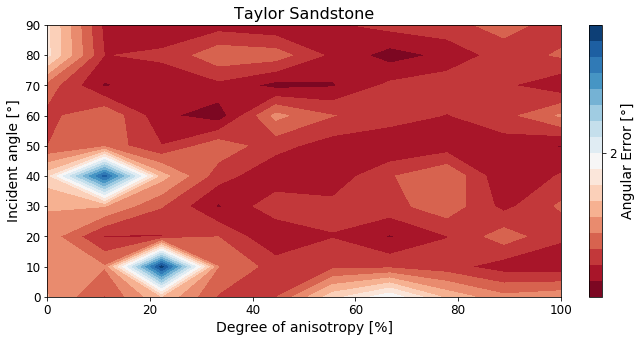

In [17]:
anis_degree = np.linspace(0,100.*procent_anisotropy,Nc)
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Taylor Sandstone',fontsize=16)
z_new = np.zeros((Ndir,Nc))
for i in range(Nc):
    for j in range(Ndir):
        z_new[j,i] = z[j,i]
        if z_new[j,i]>20.:
            z_new[j,i] = 20.
cs = ax.contourf(anis_degree,theta*180/np.pi,z_new,20,cmap='RdBu')#,vmax=20.)
#ax.contour(cs, colors='k',linewidths=1.)
cb = fig.colorbar(cs,ax=ax, orientation='vertical', fraction=0.03)
cb.set_label(label='Angular Error [°]',fontsize=14)
cb.set_ticks(range(0,20,2))
cb.ax.tick_params(labelsize=12)
#for ic in range(Nc):
#    for idir in range(Ndir):
#        plt.scatter(anis_degree[ic],theta[idir]*180/np.pi,c='k')
plt.xlabel('Degree of anisotropy [%]',fontsize=14)
#plt.xlabel('$\gamma$',fontsize=14)
plt.ylabel('Incident angle [°]',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('Taylor_Sandstone_nu_error_incident_angle_anisdegree_switch_plot_30_30.png')
plt.show()   

#### Propagation direction depending on shear wave splitting

In [18]:
fs = 100.
f = 15.

SNR_dB_u = 10.
SNR_dB_r = 10.

Nest = 10
Nc = 6
Ndir = 7
eps, delta, gamma = get_thomsen_linear(Nc)
theta = np.linspace(0,np.pi/2,Ndir)
nus = np.zeros((Ndir,3))
for idir in range(Ndir):
    nus[idir,0] = np.sin(theta[idir])
    nus[idir,2] = np.cos(theta[idir])   
z = np.zeros((len(medium),Ndir,Nc,3))   
splitting = np.zeros((len(medium),Ndir,Nc))
for i in range(1,len(medium)): #leave out isotropic case
    for ic in range(Nc):
        print(i,ic+1)
        C, density = get_specific_VTI(medium[i],eps=eps[i,ic],delta=delta[i,ic],gamma=gamma[i,ic])
        gammas = get_gamma(nus,C)
        for idir in range(Ndir):
            vel,v = get_eigenvals(gammas[idir], density)
            if abs(v[1,np.argmin(vel)]) > v[0,np.argmin(vel)]**2+v[2,np.argmin(vel)]**2: # identify SH
                V_S = np.sqrt((2*np.median(vel)**2+min(vel)**2)/3.)
                splitting[i,idir,ic] = (min(vel) - np.median(vel))/V_S
            else:
                V_S = np.sqrt((2*min(vel)**2+np.median(vel)**2)/3.)
                splitting[i,idir,ic] = (np.median(vel)-min(vel))/V_S 
            ests = np.zeros(Nest)
            ests2 = np.zeros(Nest)
            ests3 = np.zeros(Nest)
            for j in range(Nest):
                seis, t = get_seis(v, vel, nus[idir], f, fs)
                seis = make_some_noise(seis,SNR_dB_u,SNR_dB_r)
                nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=True)
                if type(nu_e)==bool:
                    n = get_polarizations(seis,'nav')
                    nu_e = n[0]
                ests[j] = np.arccos(np.dot(nu_e,nus[idir]))*180/np.pi
                if ests[j]>90.:
                    ests[j]=180.-ests[j]
                
                nu_e2 = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=False)
                if type(nu_e2)==bool:
                    n = get_polarizations(seis,'nav')
                    nu_e2 = n[0]
                ests2[j] = np.arccos(np.dot(nu_e2,nus[idir]))*180/np.pi
                if ests2[j]>90.:
                    ests2[j]=180.-ests2[j]
                
                nu_e3 = get_propagation_direction(seis,f,fs,switchoption=False,control_fac=0.5,turnoffp=False)
                if type(nu_e3)==bool:
                    n = get_polarizations(seis,'nav')
                    nu_e3 = n[0]
                ests3[j] = np.arccos(np.dot(nu_e3,nus[idir]))*180/np.pi
                if ests3[j]>90.:
                    ests3[j]=180.-ests3[j]
                
            z[i,idir,ic,0] = np.mean(ests)
            z[i,idir,ic,1] = np.mean(ests2) 
            z[i,idir,ic,2] = np.mean(ests3) 

1 1
taylor sandstone
modified
[[28.35856   11.632355  11.632355   0.         0.         0.       ]
 [11.632355  28.35856   11.632355   0.         0.         0.       ]
 [11.632355  11.632355  28.35856    0.         0.         0.       ]
 [ 0.         0.         0.         8.3631025  0.         0.       ]
 [ 0.         0.         0.         0.         8.3631025  0.       ]
 [ 0.         0.         0.         0.         0.         8.3631025]]
1 2
taylor sandstone
modified
[[29.60633664 11.17405873 11.4328498   0.          0.          0.        ]
 [11.17405873 29.60633664 11.4328498   0.          0.          0.        ]
 [11.4328498  11.4328498  28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.          9.21613895]]
1 3
taylor sandstone
modified
[[30.85411328 10.71576246 11.23131339  0.   

3 6
mesaverde laminated siltstone
modified
[[60.1278135  22.62128644 38.25576711  0.          0.          0.        ]
 [22.62128644 60.1278135  38.25576711  0.          0.          0.        ]
 [38.25576711 38.25576711 50.86955457  0.          0.          0.        ]
 [ 0.          0.          0.         17.17331825  0.          0.        ]
 [ 0.          0.          0.          0.         17.17331825  0.        ]
 [ 0.          0.          0.          0.          0.         18.75326353]]
4 1
mesaverde mudshale
modified
[[68.97068172 20.79498028 20.79498028  0.          0.          0.        ]
 [20.79498028 68.97068172 20.79498028  0.          0.          0.        ]
 [20.79498028 20.79498028 68.97068172  0.          0.          0.        ]
 [ 0.          0.          0.         24.08785072  0.          0.        ]
 [ 0.          0.          0.          0.         24.08785072  0.        ]
 [ 0.          0.          0.          0.          0.         24.08785072]]
4 2
mesaverde mudshale


6 5
quartz
modified
[[83.35112104  4.00391176 10.00554015  0.          0.          0.        ]
 [ 4.00391176 83.35112104 10.00554015  0.          0.          0.        ]
 [10.00554015 10.00554015 98.4772224   0.          0.          0.        ]
 [ 0.          0.          0.         53.21030665  0.          0.        ]
 [ 0.          0.          0.          0.         53.21030665  0.        ]
 [ 0.          0.          0.          0.          0.         39.67360464]]
6 6
quartz
modified
[[79.5695957   6.99073743 13.74513146  0.          0.          0.        ]
 [ 6.99073743 79.5695957  13.74513146  0.          0.          0.        ]
 [13.74513146 13.74513146 98.4772224   0.          0.          0.        ]
 [ 0.          0.          0.         53.21030665  0.          0.        ]
 [ 0.          0.          0.          0.         53.21030665  0.        ]
 [ 0.          0.          0.          0.          0.         36.28942914]]
7 1
Baird-shale
modified
[[20.384   4.459   4.459   0.    

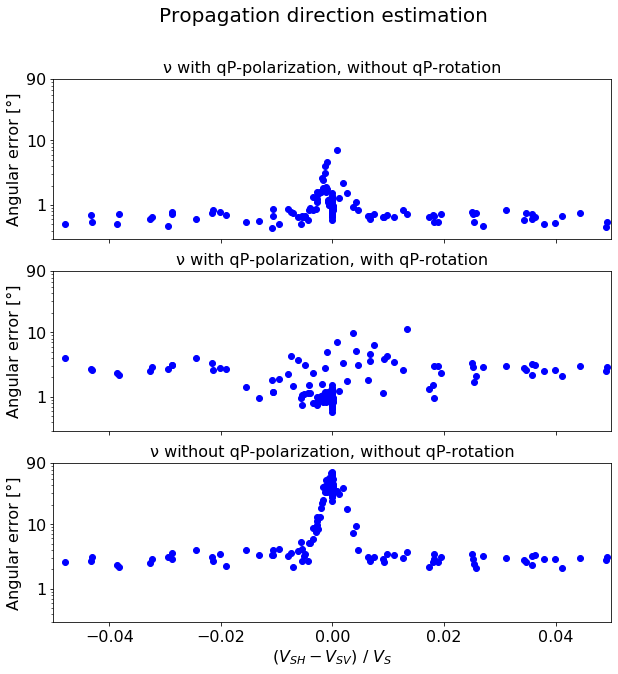

In [19]:
fig, ax = plt.subplots(nrows=3,figsize=(10,10),sharex=True,sharey=True)
for j in range(3):
    ax[j].set_ylabel('Angular error [°]',fontsize=16)
    ax[j].set_yscale('log')
    ax[j].set_ylim((0.3,90))
    ax[j].set_xlim((-0.05,0.05))
    ax[j].set_yticks([1,10,90])
    ax[j].set_yticklabels(['1','10','90'])
    ax[j].tick_params(labelsize=16)
    for i in range(Nc):
        for k in range(len(medium)):
            ax[j].scatter(splitting[k,:,i],z[k,:,i,j],c='b')
ax[0].set_title(chr(957)+' with qP-polarization, without qP-rotation',fontsize=16)
ax[1].set_title(chr(957)+' with qP-polarization, with qP-rotation',fontsize=16)
ax[2].set_title(chr(957)+' without qP-polarization, without qP-rotation',fontsize=16)
ax[2].set_xlabel('$(V_{SH}-V_{SV})~/~V_S$',fontsize=16)
fig.suptitle('Propagation direction estimation',fontsize=20)
#plt.savefig('propagation_direction_6C_depending_on_s_wave_splitting.png')
plt.show()

#### Estimate propagation direction with 7C-measurement for qP-waves

In [20]:
C, density = get_specific_VTI(medium[1])

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [21]:
f = 15.
fs = 100.
Nest = 10
Ndb = 10
SNR_dB_u = np.linspace(0.,60,Ndb)
SNR_dB_r = np.linspace(0.,60,Ndb)
SNR_dB_s = np.linspace(0.,60,Ndb)

hw = 3

Ndir = 10
thetax = np.linspace(0.,np.pi/2,Ndir)
nus = np.zeros((Ndir,3))
for idir in range(Ndir):
    nus[idir,0] = np.sin(thetax[idir])
    nus[idir,2] = np.cos(thetax[idir])
gammas = get_gamma(nus,C)
    
wavetype_pool = ['qP','qS1','qS2']
#nus, _ = get_direction('input',C,N)
r2d = 180/np.pi
z = np.zeros((Ndir,Ndb))
wk = 0 # only look at qP-waves
for idb in range(Ndb):
    print(idb+1)
    for i in range(0,len(nus)):
        vel, v = get_eigenvals(gammas[i], density)
        bins = np.zeros((3,Nest))
        wavetype = wavetype_pool[wk]
        for j in range(Nest):
            seis, t = get_seis_strain(v,vel,nus[i],f,fs)
            seis = make_some_noise(seis,SNR_dB_u[idb],SNR_dB_r[idb],SNR_dB_s=SNR_dB_s[idb])
            seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
            n1,n2,n3 = get_polarizations(seis,'nav')
            ind = pick_arrivals(seis,f,fs)
            if wavetype == 'qP': 
                it = ind[0]
                n = n1
            ests = []
            for ii in range(it-hw,it+hw+1): #average ratios over a certain time interval
                rx = seis[3,ii]
                ry = seis[4,ii]
                ezz = seis[6,ii]

                nu_e = np.zeros(3) 
                nu_e[2] = 1.
                nu_e[1] = 2*rx/ezz + n[1]/n[2]
                nu_e[0] = -2*ry/ezz + n[0]/n[2]

                nu_e *= 1/np.sqrt(np.sum(nu_e**2))
                ests.append(nu_e)

            total = [0,0,0]
            for jj in range(len(ests)):
                if np.dot(nus[i],ests[jj][:])<0.:
                    ests[jj][0] *= -1.
                    ests[jj][1] *= -1.
                    ests[jj][2] *= -1.
                total[0] += ests[jj][0]
                total[1] += ests[jj][1]
                total[2] += ests[jj][2]
            total = np.array(total)   
            total *= 1/(len(ests))
            total *= 1/np.sqrt(np.sum(total**2))
            bins[wk,j] = np.arccos(np.dot(total[:],nus[i]))*180/np.pi   
        z[i,idb] = np.mean(bins[0,:]) 

1
2
3
4
5
6
7
8
9
10


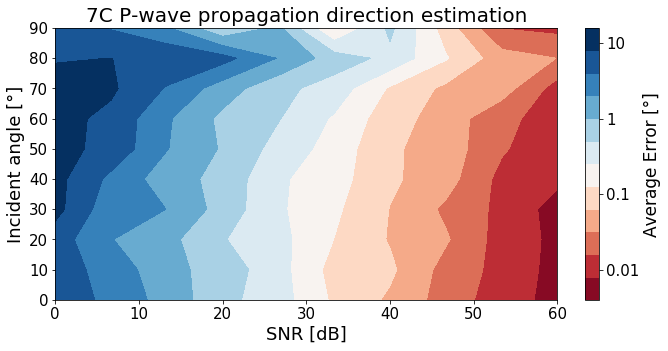

In [22]:
fig,ax = plt.subplots(figsize=(10,5))    
z2 = np.zeros((Ndir,Ndb))
for i in range(Ndir):
    for j in range(Ndb):
        z2[i,j] = np.log10(z[i,j])
        if z2[i,j]>1.:
            z2[i,j]=1.

cs = ax.contourf(SNR_dB_r,thetax*180/np.pi,z2,10,cmap='RdBu',vmax=1)
        
cb = fig.colorbar(cs,ax=ax, orientation='vertical', fraction=0.05, norm=matplotlib.colors.LogNorm())
cb.set_label(label='Average Error [°]',fontsize=17)
cb.set_ticks([-2,-1,0,1])
cb.set_ticklabels(['0.01','0.1','1','10'])
cb.ax.tick_params(labelsize=15)

ax.set_title('7C P-wave propagation direction estimation',fontsize=20)
ax.set_ylabel('Incident angle [°]',fontsize=18)
ax.set_xlabel('SNR [dB]',fontsize=18)
ax.tick_params(labelsize=15)
ax.set_ylim((0,90))
#plt.savefig('nu_7c_estimation_TS_multi_SNR.png')
plt.show()

#### Seismogram and histogram for velocity estimation

In [23]:
C, density = get_specific_VTI(medium[1])

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


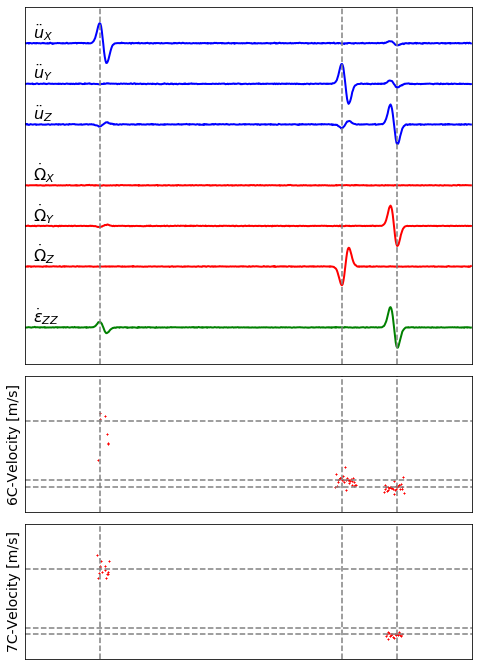

C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


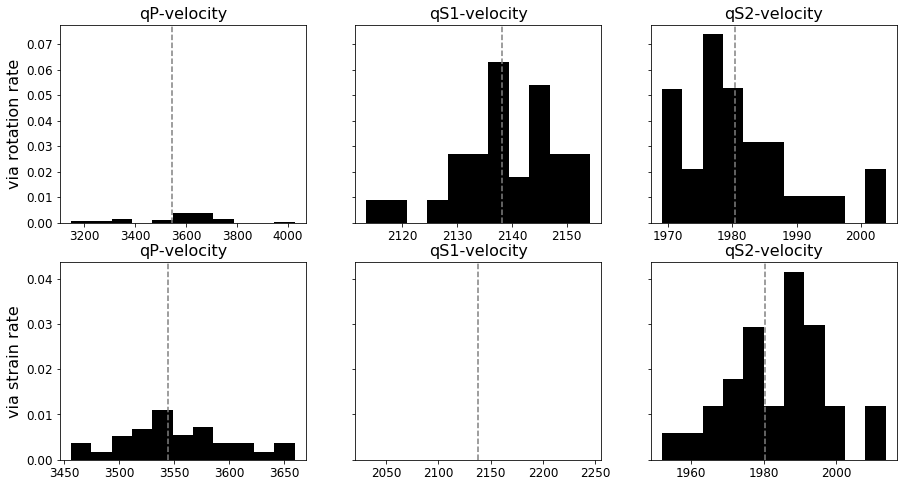

In [24]:
f = 15.
fs = 100.
SNR_dB_u = 20.
SNR_dB_r = 20.
SNR_dB_s = 20.
plot1seis = True
plotvelest = True
N = 1
Nest = 30
nbins = 11
thetax = [58.*np.pi/180.]
N = len(thetax)
nus = np.zeros((N,3))
for idir in range(N):
    nus[idir,0] = np.sin(thetax[idir])
    nus[idir,2] = np.cos(thetax[idir])
    
gammas = get_gamma(nus,C)

r2d = 180/np.pi
for i in range(0,N):
    velhist = np.zeros((Nest,3))
    velhist_strain = np.zeros((Nest,3))
    weighthist = np.zeros((Nest,3))
    weighthist_strain = np.zeros((Nest,3))
    vel,v = get_eigenvals(gammas[i], density)
    for k in range(0,Nest):
        seis, t = get_seis_strain(v, vel, nus[i], f, fs)
        seis = make_some_noise(seis,SNR_dB_u,SNR_dB_r,SNR_dB_s=SNR_dB_s)
        seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
        nt = len(seis[0,:])
        nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=True)
        if type(nu_e)==bool:
            n=get_polarizations(seis,'nav')
            nu_e = n[0]
        
        if k==0 and plot1seis:
            vel_e_strain = seis[2,:] / seis[6,:] * nu_e[2]
            weight_strain = (seis[2,:]**2 * seis[6,:]**2 * nu_e[2]**2)**(1/4)
            strain_trace = seis[6,:]
            seis,_ = rotate_seis_around_vector(seis,nu_e)

            nang = 360
            xc  = np.zeros(nang)
            ang = np.linspace(0,180,nang)
            d2r = r2d**-1

            for ii in range(nang):
                angle = ang[ii]
                xr = np.cos(angle*d2r)*seis[1,:] -  np.sin(angle*d2r)*seis[2,:]
                yr = np.sin(angle*d2r)*seis[1,:] +  np.cos(angle*d2r)*seis[2,:]
                junk = np.corrcoef(xr, yr)
                xc[ii] = junk[1,0]
                ang[ii] = angle

            imax = np.argmax(xc)
            imax2 = np.argmin(xc)
            if abs(imax)<abs(imax2):
                imax = imax2
            amax = ang[imax] + 45.

            angle = amax
            seis[1,:],seis[2,:] = np.cos(angle*d2r)*seis[1,:] -  np.sin(angle*d2r)*seis[2,:],\
                                  np.sin(angle*d2r)*seis[1,:] +  np.cos(angle*d2r)*seis[2,:]

            iqp,iqs1,iqs2 = pick_arrivals(seis,f,fs)

            safety = 10

            if iqs1>iqs2:
                iqs1,iqs2 = iqs2, iqs1
            elif abs(iqs1-iqs2)<safety:
                angle = 45.
                seis[1,:],seis[2,:] = np.cos(angle*d2r)*seis[1,:] -  np.sin(angle*d2r)*seis[2,:],\
                                      np.sin(angle*d2r)*seis[1,:] +  np.cos(angle*d2r)*seis[2,:]

                iqp,iqs1,iqs2 = pick_arrivals(seis,f,fs)

                if iqs1>iqs2:
                    iqs1,iqs2 = iqs2, iqs1
               
            vel_e = 1/2. * np.sqrt(seis[1,:]**2+seis[2,:]**2)/np.sqrt(seis[4,:]**2+seis[5,:]**2)
            weight = np.sqrt(seis[1,:]**2+seis[2,:]**2) * np.sqrt(seis[4,:]**2+seis[5,:]**2)

            if k==0 and plot1seis:
                N1 = iqp - nt//10
                N2 = iqs2 + nt//10
                fig = plt.figure(figsize=(8, 12)) 
                gs = gridspec.GridSpec(9, 1) 
                ax0 = fig.add_subplot(gs[0:5, :])
                ax1 = fig.add_subplot(gs[5:7,:])
                #ax2 = fig.add_subplot(gs[7:9,:])
                ax3 = fig.add_subplot(gs[7:,:])
                #ax4 = fig.add_subplot(gs[11:,:])


                a0 = np.max(np.sqrt(seis[0,:]**2+seis[1,:]**2+seis[2,:]**2))
                a1 = np.max(np.sqrt(seis[3,:]**2+seis[4,:]**2+seis[5,:]**2))
                a2 = np.max(abs(strain_trace))
                rf = a0/a1
                rs = a0/a2
                ax0.set_yticks([])
                ax0.plot(t[N1:N2],seis[0,N1:N2],c='b',lw=2)
                ax0.plot(t[N1:N2],seis[1,N1:N2]-2*a0,c='b',lw=2)
                ax0.plot(t[N1:N2],seis[2,N1:N2]-4*a0,c='b',lw=2)
                ax0.plot(t[N1:N2],seis[3,N1:N2]*rf-7*a0,c='r',lw=2)
                ax0.plot(t[N1:N2],seis[4,N1:N2]*rf-9*a0,c='r',lw=2)
                ax0.plot(t[N1:N2],seis[5,N1:N2]*rf-11*a0,c='r',lw=2)
                ax0.plot(t[N1:N2],strain_trace[N1:N2]*rs-14*a0,c='g',lw=2)

                ax0.text(t[N1+10],seis[0,N1+10]+a0/4,'$\ddot u_X$',fontsize=16)
                ax0.text(t[N1+10],seis[1,N1+10]-2*a0+a0/4,'$\ddot u_Y$',fontsize=16)
                ax0.text(t[N1+10],seis[2,N1+10]-4*a0+a0/4,'$\ddot u_Z$',fontsize=16)
                ax0.text(t[N1+10],seis[3,N1+10]*rf-7*a0+a0/4,'$\dot\Omega_X$',fontsize=16)
                ax0.text(t[N1+10],seis[4,N1+10]*rf-9*a0+a0/4,'$\dot\Omega_Y$',fontsize=16)
                ax0.text(t[N1+10],seis[5,N1+10]*rf-11*a0+a0/4,'$\dot\Omega_Z$',fontsize=16)
                ax0.text(t[N1+10],strain_trace[N1+10]*rs-14*a0+a0/4,'$\dot\epsilon_{ZZ}$',fontsize=16)
                ax0.tick_params(labelsize=16)
                ax0.set_xticks([])
                #ax0.axhline(seis[3,N1]*rf-5.5*a0,ls='dashed',lw=1,c='k')
                #ax0.axhline(strain_trace[N1]*rs-12.5*a0,ls='dashed',lw=1,c='k')


                #ax1.set_title('Estimated Velocities - Rotation',fontsize=16)
                ax1.axhline(max(vel),color='0.5',linestyle='--')
                ax1.axhline(np.median(vel),color='0.5',linestyle='--')
                ax1.axhline(min(vel),color='0.5',linestyle='--')
                #ax1.set_ylabel('Velocity [m/s]',fontsize=14)
                ax1.set_ylim([min(vel)*0.7,max(vel)*1.3])

                #ax3.set_title('Estimated Velocities - Strain',fontsize=16)
                ax3.axhline(max(vel),color='0.5',linestyle='--')
                ax3.axhline(np.median(vel),color='0.5',linestyle='--')
                ax3.axhline(min(vel),color='0.5',linestyle='--')
                #ax3.set_ylabel('Velocity [m/s]',fontsize=14)
                ax3.set_ylim([min(vel)*0.7,max(vel)*1.3])
                #ax4.set_xlabel('Time',fontsize=14)


            wm = np.median(weight)
            wm_strain = np.median(weight_strain)
            velbins = [[],[],[]]
            weightbins = [[],[],[]]
            velbins_strain = [[],[],[]]
            weightbins_strain = [[],[],[]]
            for it in range(nt):
                if weight[it]>wm*10.**(1.5):  # 1 order of magnitude above median
                    if k==0 and plot1seis:
                        ax1.scatter(t[it],vel_e[it],1,marker='x',color='red')

                    ivel = np.argmin([abs(it-iqp),abs(it-iqs1),abs(it-iqs2)])
                    velbins[ivel].append(vel_e[it])
                    weightbins[ivel].append(weight[it])
                if weight_strain[it]>wm_strain*10.**(1.5):  # 1 order of magnitude above median
                    if k==0 and plot1seis:
                        ax3.scatter(t[it],vel_e_strain[it],1,marker='x',color='red')
                    ivel = np.argmin([abs(it-iqp),abs(it-iqs1),abs(it-iqs2)])
                    velbins_strain[ivel].append(vel_e_strain[it])
                    weightbins_strain[ivel].append(weight_strain[it])    

            if k==0 and plot1seis:            
                #ax2.set_title('Weight - Rotation',fontsize=16)
                #ax2.set_yscale('log')
                #ax2.scatter(t,weight,1,color='blue')
                #ax2.set_ylabel('Weight',fontsize=14)

                #ax4.set_title('Weight - Strain',fontsize=16)
                #ax4.set_yscale('log')
                #ax4.scatter(t,weight_strain,1,color='blue')
                #ax4.set_ylabel('Weight',fontsize=14)
                for ax in [ax0,ax1,ax3]:
                    ax.axvline(t[iqp],color='0.5',linestyle='--')
                    ax.axvline(t[iqs1],color='0.5',linestyle='--')
                    ax.axvline(t[iqs2],color='0.5',linestyle='--')
                    ax.tick_params(labelsize=12)
                    ax.set_xlim([t[N1],t[N2]])
                    ax.set_xticks([])
                for ax in [ax0,ax1,ax3]:
                    ax.set_yticks([])

                ax1.set_ylabel('6C-Velocity [m/s]',fontsize=14)
                #ax2.set_ylabel('Weight',fontsize=14)
                ax3.set_ylabel('7C-Velocity [m/s]',fontsize=14)
                #ax4.set_ylabel('Weight',fontsize=14)
                plt.savefig('7C_velocity_estimation_time.png')        
                plt.show() 

            for j in range(0,3):
                if len(velbins[j])!=0:
                    w = np.sum(weightbins[j])
                    for jj in range(0,len(velbins[j])):
                        velhist[k,j] += 1./w * weightbins[j][jj] * velbins[j][jj]
                    weighthist[k,j] = w 
            for j in range(0,3):
                if len(velbins_strain[j])!=0:
                    w = np.sum(weightbins_strain[j])
                    for jj in range(0,len(velbins_strain[j])):
                        velhist_strain[k,j] += 1./w * weightbins_strain[j][jj] * velbins_strain[j][jj]
                    weighthist_strain[k,j] = w     
        
        else:
            estvels = estimate_velocities_noise(seis,nu_e,f,fs)
            for j in range(3):
                velhist[k,j] = estvels[j,0]
                velhist_strain[k,j] = estvels[j+3,0]
                weighthist[k,j] = estvels[j,1]
                weighthist_strain[k,j] = estvels[j+3,1]
        
    if plotvelest:    
        fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,8),sharey='row')
        ax[0,0].set_title('qP-velocity',fontsize=16)
        ax[0,1].set_title('qS1-velocity',fontsize=16)
        ax[0,2].set_title('qS2-velocity',fontsize=16)
        ax[1,0].set_title('qP-velocity',fontsize=16)
        ax[1,1].set_title('qS1-velocity',fontsize=16)
        ax[1,2].set_title('qS2-velocity',fontsize=16)
        ax[0,0].hist(velhist[:,0],bins=nbins,density=True,color='k',weights=weighthist[:,0])
        ax[0,1].hist(velhist[:,1],bins=nbins,density=True,color='k',weights=weighthist[:,1])
        ax[0,2].hist(velhist[:,2],bins=nbins,density=True,color='k',weights=weighthist[:,2])
        ax[1,0].hist(velhist_strain[:,0],bins=nbins,density=True,color='k',weights=weighthist_strain[:,0])
        ax[1,1].hist(velhist_strain[:,1],bins=nbins,density=True,color='k',weights=weighthist_strain[:,1])
        ax[1,2].hist(velhist_strain[:,2],bins=nbins,density=True,color='k',weights=weighthist_strain[:,2])
        ax[0,0].axvline(max(vel),color='0.5',linestyle='--')
        ax[0,1].axvline(np.median(vel),color='0.5',linestyle='--')
        ax[0,2].axvline(min(vel),color='0.5',linestyle='--')
        ax[1,0].axvline(max(vel),color='0.5',linestyle='--')
        ax[1,1].axvline(np.median(vel),color='0.5',linestyle='--')
        ax[1,2].axvline(min(vel),color='0.5',linestyle='--')
        ax[0,0].set_ylabel('via rotation rate',fontsize=16,rotation=90)
        ax[1,0].set_ylabel('via strain rate',fontsize=16,rotation=90)
        for i in range(0,2):
            for j in range(0,3):
                ax[i,j].tick_params(labelsize=12)
        #plt.savefig('7C_velocity_estimation_histogram.png')
        plt.show()

### Estimate velocities depending on incident angle

In [25]:
C, density = get_specific_VTI(medium[1])

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [26]:
f = 15.
fs = 100.
SNR_dB_u = 20.
SNR_dB_r = 20.
SNR_dB_s = 20.
N = 20
Nest = 20

thetax = np.linspace(0.,np.pi/2,N)
nus = np.zeros((N,3))
for idir in range(N):
    nus[idir,0] = np.sin(thetax[idir])
    nus[idir,2] = np.cos(thetax[idir])
gammas = get_gamma(nus,C)

r2d = 180/np.pi
ests = np.zeros((N,2,4))
for i in range(0,N):
    velhist = np.zeros((Nest,3))
    velhist_strain = np.zeros((Nest,3))
    weighthist = np.zeros((Nest,3))
    weighthist_strain = np.zeros((Nest,3))
    vel,v = get_eigenvals(gammas[i], density)
    for k in range(0,Nest):
        seis, t = get_seis_strain(v, vel, nus[i], f, fs)
        seis = make_some_noise(seis,SNR_dB_u,SNR_dB_r,SNR_dB_s=SNR_dB_s)
        seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
        nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=True)
        if type(nu_e)==bool:
            n = get_polarizations(seis,'nav')
            nu_e = n[0]
            
        velests = estimate_velocities_noise(seis,nu_e,f,fs)   
        for j in range(3):
            velhist[k,j] = velests[j,0]
            velhist_strain[k,j] = velests[j+3,0]
            weighthist[k,j] = velests[j,1]
            weighthist_strain[k,j] = velests[j+3,1]
    
    print(i+1)
    ests[i,0,0] = np.mean(velhist[velhist[:,0]>0.,0])/max(vel)
    ests[i,1,0] = np.sqrt(np.var(velhist[velhist[:,0]>0.,0]))/max(vel)
    ests[i,0,1] = np.mean(velhist_strain[velhist_strain[:,0]>0.,0])/max(vel)
    ests[i,1,1] = np.sqrt(np.var(velhist_strain[velhist_strain[:,0]>0.,0]))/max(vel)
    ests[i,0,2] = np.mean(velhist[velhist[:,1]>0.,1])/np.median(vel)
    ests[i,1,2] = np.sqrt(np.var(velhist[velhist[:,1]>0.,1]))/np.median(vel)
    ests[i,0,3] = np.mean(velhist[velhist[:,2]>0.,2])/min(vel)
    ests[i,1,3] = np.sqrt(np.var(velhist[velhist[:,2]>0.,2]))/min(vel)

1


C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


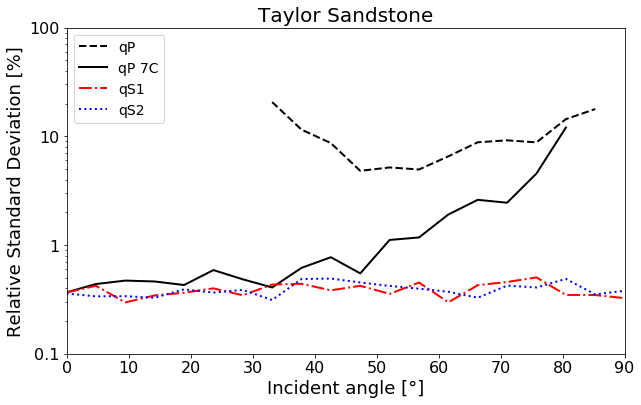

In [27]:
ests2 = np.zeros((N,2,4))
for i in range(N):
    for j in range(2):
        for k in range(4):
            ests2[i,j,k] = ests[i,j,k]*100
            if ests2[i,j,k]==0. or ests2[i,j,k]>100.:
                ests2[i,j,k] = np.nan

label = ['qP','qP 7C','qS1','qS2']
color = ['k','k','r','b']
style = ['dashed','solid','dashdot','dotted']
fig, ax = plt.subplots(figsize=(10,6))
ax.set_yscale('log')
for j in range(4):
    ax.plot(thetax*180/np.pi,ests2[:,1,j],label=label[j],linewidth=2,c=color[j],linestyle=style[j])
ax.legend(fontsize=14,loc=2) 
ax.set_ylabel('Relative Standard Deviation [%]',fontsize=18)
ax.set_xlabel('Incident angle [°]',fontsize=18)
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.tick_params(labelsize=16)
ax.set_xlim((0,90))
ax.set_title('Taylor Sandstone',fontsize=20)
#plt.savefig('Estimate_velocities_taylor_sandstone_switch_Stdpc_weight_20_20_20.png')
plt.show()

#### Shear wave velocity estimation

In [28]:
C, density = get_specific_VTI(medium[1])

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [29]:
f = 15.
fs = 100.
Ndir = 10
Ndb = 10
Nest = 10
SNR_dB_u = np.linspace(0,80,Ndb)
SNR_dB_r = np.linspace(0,80,Ndb)
SNR_dB_s = np.linspace(0,80,Ndb)
thetax = np.linspace(0,np.pi/2,Ndir)
nus = np.zeros((Ndir,3))
for i in range(Ndir):
    nus[i,0] = np.sin(thetax[i])
    nus[i,2] = np.cos(thetax[i])
gammas = get_gamma(nus,C) 

ests = np.zeros((Ndir,Ndb,2))
for i in range(Ndir):
    print(i)
    for ii in range(Ndb):
        velhist = np.zeros((Nest,3))
        velhist_strain = np.zeros((Nest,3))
        weighthist = np.zeros((Nest,3))
        weighthist_strain = np.zeros((Nest,3))
        for k in range(Nest):
            seis, t = get_seis_strain(v, vel, nus[i], f, fs)
            seis = make_some_noise(seis,SNR_dB_u[ii],SNR_dB_r[ii],SNR_dB_s=SNR_dB_s[ii])
            seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
            nt = len(seis[0,:])
            nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5)
            if type(nu_e) == bool:
                nu_e = get_polarizations(seis,'nav')[0]
             
            velests = estimate_velocities_noise(seis,nu_e,f,fs)   
            for j in range(3):
                velhist[k,j] = velests[j,0]
                velhist_strain[k,j] = velests[j+3,0]
                weighthist[k,j] = velests[j,1]
                weighthist_strain[k,j] = velests[j+3,1]        
                    
        ests[i,ii,0] = np.sqrt(np.var(velhist[velhist[:,1]>0.,1]))/np.median(vel)
        ests[i,ii,1] = np.sqrt(np.var(velhist[velhist[:,2]>0.,2]))/min(vel)

0
1
2
3
4
5
6
7
8
9


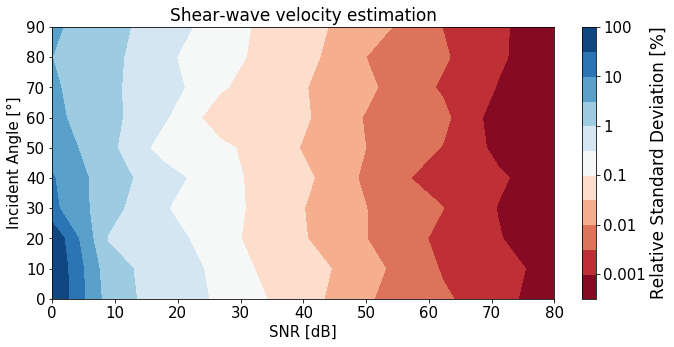

In [30]:
ests2 = np.zeros((Ndir,Ndb,2))
for i in range(Ndir):
    for j in range(Ndb):
        for k in range(2):
            ests2[i,j,k] = ests[i,j,k]*100.
            if ests2[i,j,k]>100.:
                ests2[i,j,k]=100.
            if ests2[i,j,k]==0.:
                ests2[i,j,k]=np.nan
            ests2[i,j,k] = np.log10(ests2[i,j,k])    
            
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Shear-wave velocity estimation',fontsize=17)
cs = ax.contourf(SNR_dB_r,thetax*180/np.pi,(ests2[:,:,0]),10,cmap='RdBu',vmax=2)
cb = fig.colorbar(cs,ax=ax, orientation='vertical', fraction=0.05, norm=matplotlib.colors.LogNorm())
cb.set_label(label='Relative Standard Deviation [%]',fontsize=17)
cb.set_ticks([-3,-2,-1,0,1,2])
cb.set_ticklabels(['0.001','0.01','0.1','1','10','100'])
cb.ax.tick_params(labelsize=15)
ax.set_xlabel('SNR [dB]',fontsize=15)
ax.set_ylabel('Incident Angle [°]',fontsize=15)
ax.tick_params(labelsize=15)
#plt.savefig('Velocity_estimation_S_incident_angle_SNR.png')
plt.show()

#### P-velocity estimation depending on Noise and anisotropy for 6C and 7C

In [31]:
C, density = get_specific_VTI(medium[1], give_thomsen=True)

taylor sandstone
 
vp0     = 3368
vs0     = 1829
eps     = 0.11
delta   = -0.035
gamma   = 0.255
density = 2500
 
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [32]:
index = 1
f = 15.
fs = 100.
Ndb = 5
SNR_dB_u = np.linspace(0,60,Ndb)
SNR_dB_r = np.linspace(0,60,Ndb)
SNR_dB_s = np.linspace(0,60,Ndb)
Nc = 5
Nest = 5

thetax = [58.*np.pi/180.]
N = len(thetax)
nus = np.zeros((N,3))
for idir in range(N):
    nus[idir,0] = np.sin(thetax[idir])
    nus[idir,2] = np.cos(thetax[idir])

percentage = 2.
eps = np.linspace(0.,0.11*percentage,Nc)     #values have to correspond to medium index
delta = np.linspace(0.,-0.035*percentage,Nc)
gamma = np.linspace(0.,0.255*percentage,Nc)

anis = np.zeros(Nc)   ###anis will be plotted on y-axis, degree of P-anisotropy in percent
Ndegree = 360
thetay = np.linspace(0.,np.pi/2.,Ndegree)
nusy = np.zeros((Ndegree,3))
for i in range(Ndegree):
    nusy[i,0] = np.sin(thetay[i])
    nusy[i,2] = np.cos(thetay[i])
for i in range(Nc):
    C, density = get_specific_VTI(medium[index],eps=eps[i],gamma=gamma[i],delta=delta[i])
    gammasy = get_gamma(nusy,C)
    pvel = np.zeros(Ndegree)
    for idir in range(Ndegree):
        vel,v = get_eigenvals(gammasy[idir], density)
        pvel[idir] = max(vel)
    anis[i] = (max(pvel)/min(pvel) - 1.)*100.
    
pangle = np.zeros(Nc)   ###pangle may be plotted on y-axis, angle between Ppol and nu
for i in range(Nc):
    C, density = get_specific_VTI(medium[1],eps=eps[i],gamma=gamma[i],delta=delta[i])
    gammas = get_gamma(nus,C)
    vel,v = get_eigenvals(gammas[0], density)
    pangle[i] = (np.arccos(abs(np.dot(nus[0],v[:,np.argmax(vel)])))*180/np.pi)
    
r2d = 180/np.pi
ests = np.zeros((Nc,Ndb,2))
for i in range(0,Nc):
    C, density = get_specific_VTI(medium[1],eps=eps[i],delta=delta[i],gamma=gamma[i])
    gammas = get_gamma(nus,C)
    vel,v = get_eigenvals(gammas[0], density)
    for ii in range(Ndb):
        print(Ndb*i+ii)
        velhist = np.zeros((Nest,3))
        velhist_strain = np.zeros((Nest,3))
        weighthist = np.zeros((Nest,3))
        weighthist_strain = np.zeros((Nest,3))        
        for k in range(0,Nest):
            seis, t = get_seis_strain(v, vel, nus[0], f, fs)
            seis = make_some_noise(seis,SNR_dB_u[ii],SNR_dB_r[ii],SNR_dB_s=SNR_dB_s[ii])
            seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
            nt = len(seis[0,:])
            nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=True)
            if type(nu_e)==bool:
                npol = get_polarizations(seis,'nav')
                nu_e = npol[0]
                
            velests = estimate_velocities_noise(seis,nu_e,f,fs)   
            for j in range(3):
                velhist[k,j] = velests[j,0]
                velhist_strain[k,j] = velests[j+3,0]
                weighthist[k,j] = velests[j,1]
                weighthist_strain[k,j] = velests[j+3,1]   

        ests[i,ii,0] = np.sqrt(np.var(velhist[velhist[:,0]>0.,0]))/max(vel)*100
        ests[i,ii,1] = np.sqrt(np.var(velhist_strain[velhist_strain[:,0]>0.,0]))/max(vel)*100

taylor sandstone
modified
[[28.35856   11.632355  11.632355   0.         0.         0.       ]
 [11.632355  28.35856   11.632355   0.         0.         0.       ]
 [11.632355  11.632355  28.35856    0.         0.         0.       ]
 [ 0.         0.         0.         8.3631025  0.         0.       ]
 [ 0.         0.         0.         0.         8.3631025  0.       ]
 [ 0.         0.         0.         0.         0.         8.3631025]]
taylor sandstone
modified
[[31.4780016  10.48661433 11.12976382  0.          0.          0.        ]
 [10.48661433 31.4780016  11.12976382  0.          0.          0.        ]
 [11.12976382 11.12976382 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         10.49569364]]
taylor sandstone
modified
[[34.5974432   9.34087365 10.61386654  0.          0.   

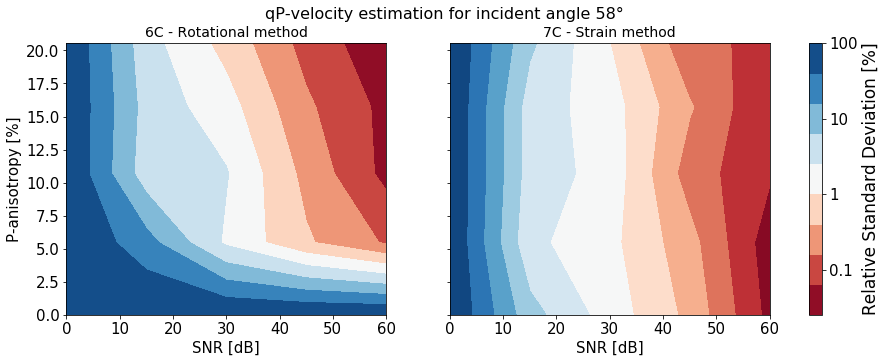

In [33]:
ests2 = np.zeros((Nc,Ndb,2))
vmax = 100.
for i in range(Nc):
    for j in range(Ndb):
        for k in range(2):
            ests2[i,j,k] = ests[i,j,k]
            if ests2[i,j,k]>vmax:
                ests2[i,j,k] = vmax
            if ests2[i,j,k]==0.:
                ests2[i,j,k] = vmax
            if np.isnan(ests2[i,j,k]):
                ests2[i,j,k]= vmax
            ests2[i,j,k] = np.log10(ests2[i,j,k])  

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,5),sharex=True,sharey=True)
cs1 = ax[0].contourf(SNR_dB_r,anis,ests2[:,:,0],10,cmap='RdBu',vmax=2.)
cs2 = ax[1].contourf(SNR_dB_r,anis,ests2[:,:,1],10,cmap='RdBu',vmax=2.)
ax[0].set_ylabel('P-anisotropy [%]',fontsize=15)

#cs1 = ax[0].contourf(SNR_dB_r,pangle,ests2[:,:,0],10,cmap='RdBu',vmax=2.)
#cs2 = ax[1].contourf(SNR_dB_r,pangle,ests2[:,:,1],10,cmap='RdBu',vmax=2.)
#ax[0].set_ylabel('qP-polarization deviation [°]',fontsize=15)

cb = fig.colorbar(cs1,ax=ax, orientation='vertical', fraction=0.05, norm=matplotlib.colors.LogNorm())
cb.set_label(label='Relative Standard Deviation [%]',fontsize=17)
cb.set_ticks([-1,0,1,2,3])
cb.set_ticklabels(['0.1','1','10','100','1000'])
cb.ax.tick_params(labelsize=15)
ax[0].set_xlabel('SNR [dB]',fontsize=15)
ax[1].set_xlabel('SNR [dB]',fontsize=15)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
fig.suptitle('qP-velocity estimation for incident angle '+str(round(thetax[0]*180/np.pi))+'°',fontsize=16)
ax[0].set_title('6C - Rotational method',fontsize=14)
ax[1].set_title('7C - Strain method',fontsize=14)
#plt.savefig('Estimate_velocities_taylor_sandstone_bugfix_2d_pvels.png')
#plt.savefig('Estimate_velocities_taylor_sandstone_bugfix_2d_pvels_ppolangle.png')
plt.show()

#### 6C Inversion histograms

In [34]:
C, density = get_specific_VTI(medium[1])

ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [35]:
f = 15.
fs = 100.
SNR_dB_u = 20.
SNR_dB_r = 20.
N = 25  
Ninv = 25

C_e = np.zeros((Ninv,6,6))
r2d = 180/np.pi
mode = 'triclinic'
sucinv = 0
for k in range(0,Ninv):
    nus, gammas = get_direction('random',C,N)
    d = np.array([])
    G = np.array([])
    count = 0
    for i in range(0,N):
        vel_e = np.zeros(3)
        vel_w = np.zeros(3)
        vel,v = get_eigenvals(gammas[i], density)
        seis, t = get_seis(v, vel, nus[i], f, fs)
        seis = make_some_noise(seis,SNR_dB_u,SNR_dB_r)
        nt = len(seis[0,:])
        n_trans = get_polarizations(seis,'nav')
        nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=True)
        if type(nu_e)==bool:
            nu_e = n_trans[0]
            
        velests = estimate_velocities_noise(seis,nu_e,f,fs)   
        for j in range(3):
            vel_e[j] = velests[j,0]
            vel_w[j] = velests[j,1]
        
        if vel_w[0]>0. and vel_e[0]<3*vel_e[1]:
            count += 1 
            d,G = add_new_data(mode,d,G,nu_e,vel_e,n_trans,density)
           
    if count>=6:
        sucinv += 1 
        Q = np.linalg.inv(np.dot(G.transpose(),G)) 
        m = np.dot(np.dot(Q,G.transpose()),d)
        C_e[k,:,:] = sort_elastic_coeff(mode,m) 
        if np.sum(C_e[k,:,:]**2)*1e-18>1e5:
            sucinv -= 1
            print('index '+str(k)+' failed')
            C_e[k,:,:] = np.zeros((6,6))
print(sucinv, 'successful inversions')

25 successful inversions


0 estimates stripped


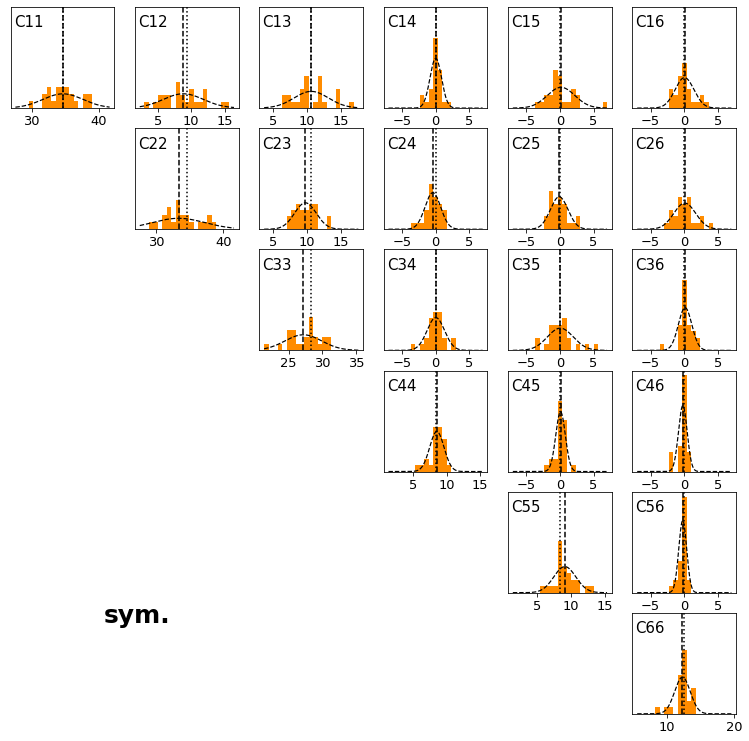

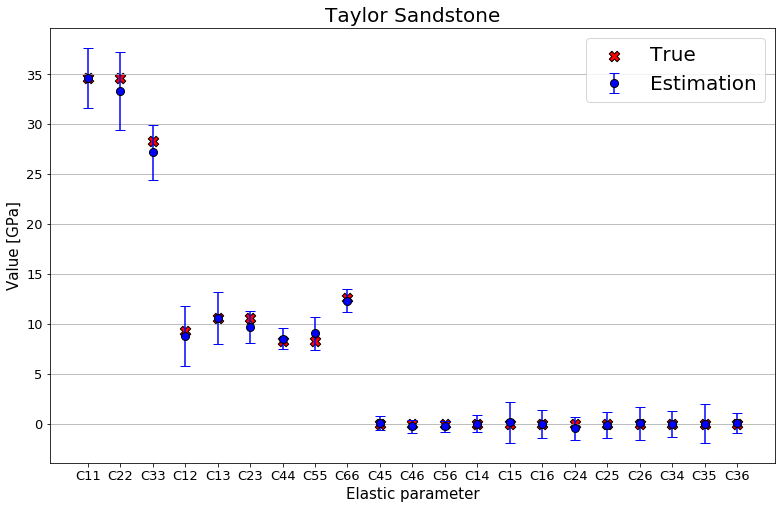

In [36]:
triangularplot(C,C_e,21,7,Ninv,False,savename=' ')
# true tensor, estimated tensors, nbins, halfwidth of plot in GPa, save (bool), savename 

#### Inversion precision depending on SNR and Number of events

In [37]:
C, density = get_specific_VTI(medium[1])
ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [38]:
f = 15.
fs = 100.
Ndb = 5
SNR_dB_u = np.linspace(10.,40.,Ndb)
SNR_dB_r = np.linspace(10.,40.,Ndb)
SNR_dB_s = np.linspace(10.,40.,Ndb)
N = [6,7,10,15,20]
Ndir = len(N)
Ninv = 10

r2d = 180/np.pi
mode = 'triclinic'
angles = np.linspace(0,2*np.pi,1000)
x = np.cos(angles)
y = np.sin(angles)
C_e = np.zeros((Ndb,Ndir,Ninv,6,6))
C_e2 = np.zeros((Ndb,Ndir,Ninv,6,6))
for idb in range(Ndb):
    for idir in range(Ndir):
        sucinv_s = 0
        sucinv_r = 0 
        for k in range(0,Ninv):
            nus, gammas = get_direction('random',C,int(N[idir]))
            d = np.array([])
            d2 = np.array([])
            G = np.array([])
            G2 = np.array([])
            count = 0
            count2 = 0
            for i in range(0,int(N[idir])):
                vel_e = np.zeros(4)
                vel_w = np.zeros(4)
                
                vel,v = get_eigenvals(gammas[i], density)
                seis, t = get_seis_strain(v, vel, nus[i], f, fs)
                seis = make_some_noise(seis,SNR_dB_u[idb],SNR_dB_r[idb],SNR_dB_s=SNR_dB_s[idb])
                seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
                nt = len(seis[0,:])
                n_trans = get_polarizations(seis,'nav')
                nu_e = get_propagation_direction(seis,f,fs,switchoption=True, control_fac=0.5,turnoffp=True)
                if type(nu_e)==bool:
                    nu_e = n_trans[0]    
                
                velests = estimate_velocities_noise(seis,nu_e,f,fs)
                for j in range(4):
                    vel_e[j] = velests[j,0]
                    vel_w[j] = velests[j,1]
                    
                
                if vel_w[0]>0. and vel_e[0]<3*vel_e[1]:
                    count += 1 
                    d,G = add_new_data(mode,d,G,nu_e,vel_e,n_trans,density)
                    
                if vel_w[3]>0. and vel_e[3]<3*vel_e[1]:
                    count2 += 1 
                    vel2 = np.array([vel_e[3],vel_e[1],vel_e[2]])
                    d2,G2 = add_new_data(mode,d2,G2,nu_e,vel2,n_trans,density)
                   
                 
            if count>=6:
                sucinv_s += 1 
                Q = np.linalg.inv(np.dot(G.transpose(),G)) 
                m = np.dot(np.dot(Q,G.transpose()),d)
                C_e[idb,idir,k,:,:] = sort_elastic_coeff(mode,m) 
                if np.sum(C_e[idb,idir,k,:,:]**2)*1e-18>1e5:
                    print('strain','index '+str(k)+' failed')
                    C_e[idb,idir,k,:,:] = np.zeros((6,6))
                    sucinv_s -= 1
            
            if count2>=6:
                sucinv_r += 1 
                Q = np.linalg.inv(np.dot(G2.transpose(),G2)) 
                m = np.dot(np.dot(Q,G2.transpose()),d2)
                C_e2[idb,idir,k,:,:] = sort_elastic_coeff(mode,m) 
                if np.sum(C_e2[idb,idir,k,:,:]**2)*1e-18>1e5:
                    print('rot','index '+str(k)+' failed')
                    C_e2[idb,idir,k,:,:] = np.zeros((6,6))  
                    sucinv_r -= 1
        print(idb*Ndir+idir+1,'strain: ',sucinv_s,'rot: ',sucinv_r,'successful inversions')

1 strain:  0 rot:  1 successful inversions
2 strain:  0 rot:  2 successful inversions
3 strain:  0 rot:  8 successful inversions
4 strain:  0 rot:  9 successful inversions
5 strain:  0 rot:  10 successful inversions
6 strain:  0 rot:  5 successful inversions
7 strain:  4 rot:  9 successful inversions
8 strain:  7 rot:  10 successful inversions
9 strain:  10 rot:  10 successful inversions
10 strain:  10 rot:  10 successful inversions
11 strain:  4 rot:  5 successful inversions
12 strain:  7 rot:  9 successful inversions
13 strain:  10 rot:  10 successful inversions
14 strain:  10 rot:  10 successful inversions
15 strain:  10 rot:  10 successful inversions
16 strain:  4 rot:  6 successful inversions
17 strain:  5 rot:  10 successful inversions
18 strain:  10 rot:  10 successful inversions
19 strain:  10 rot:  10 successful inversions
20 strain:  10 rot:  10 successful inversions
21 strain:  6 rot:  7 successful inversions
22 strain:  9 rot:  10 successful inversions
23 strain:  10 rot:  

C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in greater


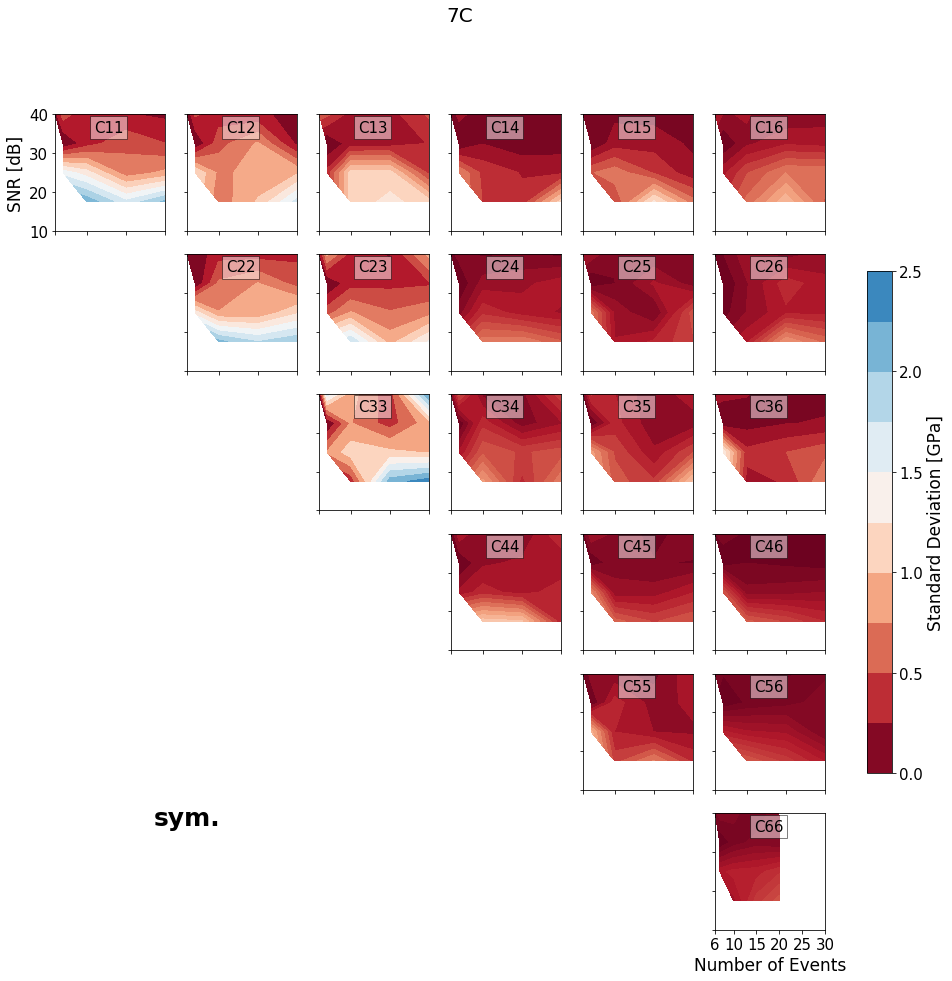

C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in greater


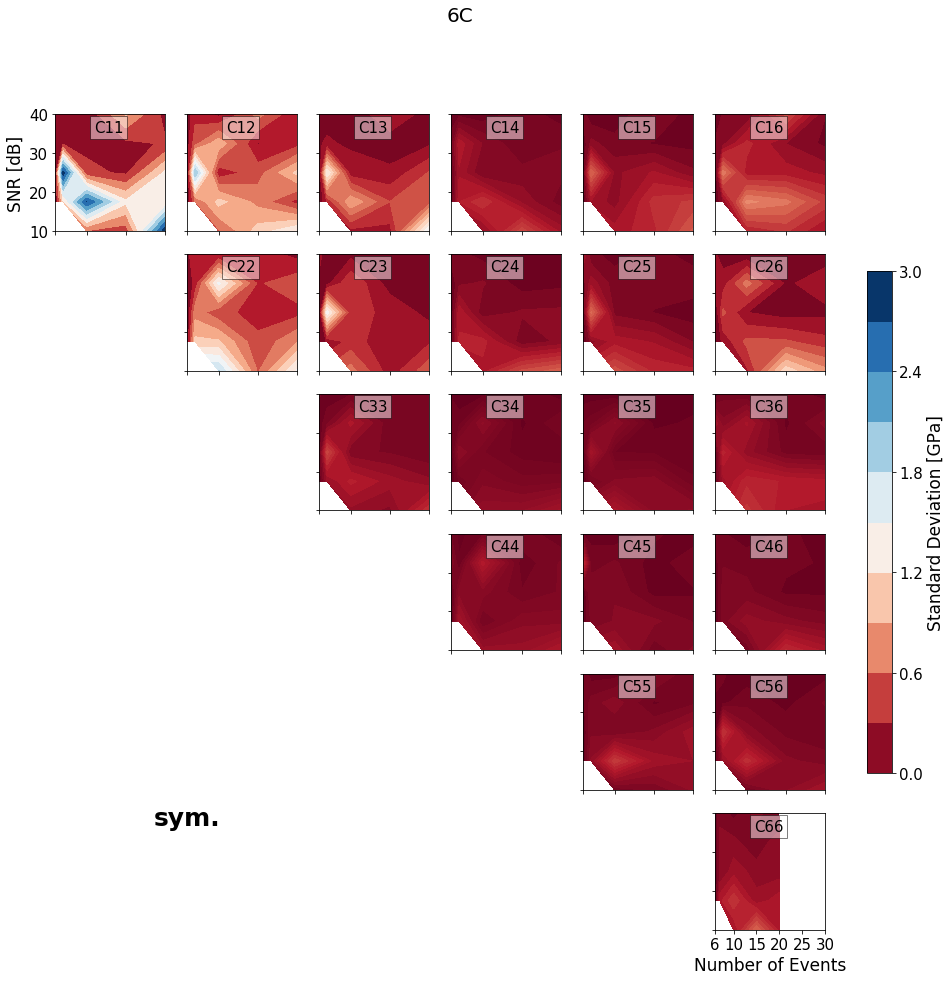

In [39]:
from scipy import interpolate

sig = np.zeros((Ndb,Ndir,6,6))
sig2 = np.zeros((Ndb,Ndir,6,6))
sigs = []
sigs2 = [] 
maxsig = 6. 
for i in range(Ndb):
    for j in range(Ndir):
        for k in range(6):
            for l in range(6):
                varlist = []
                varlist2 = []
                for m in range(Ninv):
                    if C_e[i,j,m,k,l]==0.:
                        pass
                    else:
                        varlist.append(C_e[i,j,m,k,l])
                    if C_e2[i,j,m,k,l]==0.:
                        pass
                    else:
                        varlist2.append(C_e2[i,j,m,k,l])
                        
                if len(varlist)<=4:     #not enough successful inversions
                    sig[i,j,k,l] = np.nan
                else:    
                    varlist.sort()
                    sig[i,j,k,l] = np.sqrt(np.var(varlist[2:len(varlist)-2]))*1e-9
                if sig[i,j,k,l] >maxsig:
                    sig[i,j,k,l] = maxsig

                if sig[i,j,k,l]!=0.0 and not np.isnan(sig[i,j,k,l]):
                    sigs.append(sig[i,j,k,l])
                    
                if len(varlist2)<=4:
                    sig2[i,j,k,l] = np.nan
                else:    
                    varlist2.sort()
                    sig2[i,j,k,l] = np.sqrt(np.var(varlist2[2:len(varlist2)-2]))*1e-9
                if sig2[i,j,k,l] >maxsig:
                    sig2[i,j,k,l] = maxsig

                if sig2[i,j,k,l]!=0.0 and not np.isnan(sig2[i,j,k,l]):
                    sigs2.append(sig2[i,j,k,l])    
    

vmin = min(sigs)
vmax = max(sigs)
vmin2 = min(sigs2)
vmax2 = max(sigs2)
vmax = max([vmax,vmax2])
vmin = min([vmin,vmin2])

param = [['C11','C12','C13','C14','C15','C16'],\
         ['C00','C22','C23','C24','C25','C26'],\
         ['C00','C00','C33','C34','C35','C36'],\
         ['C00','C00','C00','C44','C45','C46'],\
         ['C00','C00','C00','C00','C55','C56'],\
         ['C00','C00','C00','C00','C00','C66']]
                

#norm = colors.Normalize(vmin=vmin, vmax=vmax)
fig, ax = plt.subplots(ncols=6,nrows=6,figsize=(15,15),sharex=True,sharey=True)
fig.suptitle('7C',fontsize=20)
dist_master = 0.
for i in range(6):
    for j in range(6):
        if i<=j:
            z = sig[:,:,i,j]       
            array = np.ma.masked_invalid(z)
            xx, yy = np.meshgrid(N, SNR_dB_u)
            #get only the valid values, interpolate missing data
            x1 = xx[~array.mask]
            y1 = yy[~array.mask]
            newarr = z[~array.mask]

            znew = interpolate.griddata((x1, y1), newarr.ravel(),
                                      (xx, yy),
                                         method='cubic')    
            dist = max(znew[znew>0.])-min(znew[znew>0.])
            cs = ax[i,j].contourf(xx, yy, znew,10,cmap='RdBu',vmin=vmin,vmax=vmax)
            if dist>dist_master:
                dist_master = dist
                cs1 = cs    
            #ax[i,j].contour(cs, colors='k',linewidths=1.)
            ax[i,j].text(0.35,0.85,param[i][j],transform = ax[i,j].transAxes,fontsize=15,bbox=dict(facecolor='white', alpha=.5))
        else:
            ax[i,j].set_axis_off()
            if i==5 and j==0:
                    ax[i,j].text(0.9,0.9,'sym.',weight='bold',transform = ax[i,j].transAxes,fontsize=25)     

cb = fig.colorbar(cs1,ax=ax, orientation='vertical', fraction=0.03)#,norm=matplotlib.colors.LogNorm())
cb.set_label(label='Standard Deviation [GPa]',fontsize=17)
cb.ax.tick_params(labelsize=15)
ax[5,5].set_xlabel('Number of Events',fontsize=17) 
ax[0,0].set_ylabel('SNR [dB]',fontsize=17)
ax[5,5].set_xticks(ticks=[6,10,15,20,25,30])
ax[0,0].set_yticks(ticks=[10,20,30,40])
ax[5,5].tick_params(labelsize=15)
ax[0,0].tick_params(labelsize=15)
#plt.savefig('Taylor_Directions_Noise_7c_2_plot.png')            
plt.show()

fig, ax = plt.subplots(ncols=6,nrows=6,figsize=(15,15),sharex=True,sharey=True)
fig.suptitle('6C',fontsize=20)
dist_master = 0.
for i in range(6):
    for j in range(6):
        if i<=j:
            z = sig2[:,:,i,j]       
            array = np.ma.masked_invalid(z)
            xx, yy = np.meshgrid(N, SNR_dB_u)
            #get only the valid values, interpolate missing data
            x1 = xx[~array.mask]
            y1 = yy[~array.mask]
            newarr = z[~array.mask]

            znew = interpolate.griddata((x1, y1), newarr.ravel(),
                                      (xx, yy),
                                         method='cubic')    
            dist = max(znew[znew>0.])-min(znew[znew>0.])
            cs = ax[i,j].contourf(xx, yy, znew,10,cmap='RdBu',vmin=vmin,vmax=vmax)
            if dist>dist_master:
                dist_master = dist
                cs1 = cs    
            #ax[i,j].contour(cs, colors='k',linewidths=1.)
            ax[i,j].text(0.35,0.85,param[i][j],transform = ax[i,j].transAxes,fontsize=15,bbox=dict(facecolor='white', alpha=.5))
        else:
            ax[i,j].set_axis_off()
            if i==5 and j==0:
                    ax[i,j].text(0.9,0.9,'sym.',weight='bold',transform = ax[i,j].transAxes,fontsize=25)     

cb = fig.colorbar(cs1,ax=ax, orientation='vertical', fraction=0.03)#,norm=matplotlib.colors.LogNorm())
cb.set_label(label='Standard Deviation [GPa]',fontsize=17)
cb.ax.tick_params(labelsize=15)
ax[5,5].set_xlabel('Number of Events',fontsize=17) 
ax[0,0].set_ylabel('SNR [dB]',fontsize=17)
ax[5,5].set_xticks(ticks=[6,10,15,20,25,30])
ax[0,0].set_yticks(ticks=[10,20,30,40])
ax[5,5].tick_params(labelsize=15)
ax[0,0].tick_params(labelsize=15)
#plt.savefig('Taylor_Directions_Noise_2_plot.png')            
plt.show()

#### Dependency of 6C-inversion on degree of anisotropy

In [40]:
C, density = get_specific_VTI(medium[1],give_thomsen=True)
ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

taylor sandstone
 
vp0     = 3368
vs0     = 1829
eps     = 0.11
delta   = -0.035
gamma   = 0.255
density = 2500
 
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [41]:
index = 1 # medium index
f = 15.
fs = 100.
Ndb = 5
Nc = 5
Ninv = 10
N = 25 

SNR_dB_u = np.linspace(15,45,Ndb)
SNR_dB_r = np.linspace(15,45,Ndb)

percentage = 1.               ##numbers have to correspond to medium index
eps     = np.linspace(0.,0.11*percentage,Nc)
delta   = np.linspace(0.,-0.035*percentage,Nc)
gamma   = np.linspace(0.,0.255*percentage,Nc) 

C_e = np.zeros((Ndb,Nc,Ninv,6,6))
r2d = 180/np.pi
mode = 'triclinic'

anis = np.zeros(Nc)   ###anis will be plotted on y-axis, degree of P-anisotropy in percent
Ndegree = 360
thetay = np.linspace(0.,np.pi/2.,Ndegree)
nusy = np.zeros((Ndegree,3))
for i in range(Ndegree):
    nusy[i,0] = np.sin(thetay[i])
    nusy[i,2] = np.cos(thetay[i])
for i in range(Nc):
    C, density = get_specific_VTI(medium[index],eps=eps[i],gamma=gamma[i],delta=delta[i])
    gammasy = get_gamma(nusy,C)
    pvel = np.zeros(Ndegree)
    for idir in range(Ndegree):
        vel,v = get_eigenvals(gammasy[idir], density)
        pvel[idir] = max(vel)
    anis[i] = (max(pvel)/min(pvel) - 1.)*100.

for p in range(0,Ndb):
    for q in range(0,Nc):
        sucinv = 0
        C, density = get_specific_VTI(medium[index],eps=eps[q],delta=delta[q],gamma=gamma[q])
        for k in range(0,Ninv):
            nus, gammas = get_direction('random',C,N)
            d = np.array([])
            G = np.array([])
            count = 0
            for i in range(0,N):
                vel_e = np.zeros(3)
                vel_w = np.zeros(3)
                vel,v = get_eigenvals(gammas[i], density)
                seis, t = get_seis(v, vel, nus[i], f, fs)
                seis = make_some_noise(seis,SNR_dB_u[p],SNR_dB_r[p])
                n_trans = get_polarizations(seis,'nav')
                nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=True)
                if type(nu_e)==bool:
                    nu_e = n_trans[0]
                    
                velests = estimate_velocities_noise(seis,nu_e,f,fs)
                for j in range(3):
                    vel_e[j] = velests[j,0]
                    vel_w[j] = velests[j,1]
                

                if vel_w[0]>0. and vel_e[0]<3*vel_e[1] and vel_e[0]<3*vel_e[2]:
                    count += 1 
                    d,G = add_new_data(mode,d,G,nu_e,vel_e,n_trans,density)

            if count>=6:
                sucinv += 1 
                Q = np.linalg.inv(np.dot(G.transpose(),G)) 
                m = np.dot(np.dot(Q,G.transpose()),d)
                C_e[p,q,k,:,:] = sort_elastic_coeff(mode,m) 
                if np.sum(C_e[p,q,k,:,:]**2)*1e-18>1e5:
                    print('index '+str(k)+' failed')
                    C_e[p,q,k,:,:] = np.zeros((6,6))
                    sucinv -= 1
        print(p,q,': ',sucinv, 'successful inversions')

taylor sandstone
modified
[[28.35856   11.632355  11.632355   0.         0.         0.       ]
 [11.632355  28.35856   11.632355   0.         0.         0.       ]
 [11.632355  11.632355  28.35856    0.         0.         0.       ]
 [ 0.         0.         0.         8.3631025  0.         0.       ]
 [ 0.         0.         0.         0.         8.3631025  0.       ]
 [ 0.         0.         0.         0.         0.         8.3631025]]
taylor sandstone
modified
[[29.9182808  11.05948466 11.38265854  0.          0.          0.        ]
 [11.05948466 29.9182808  11.38265854  0.          0.          0.        ]
 [11.38265854 11.38265854 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.          9.42939807]]
taylor sandstone
modified
[[31.4780016  10.48661433 11.12976382  0.          0.   

2 1 :  10 successful inversions
taylor sandstone
modified
[[31.4780016  10.48661433 11.12976382  0.          0.          0.        ]
 [10.48661433 31.4780016  11.12976382  0.          0.          0.        ]
 [11.12976382 11.12976382 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         10.49569364]]
2 2 :  10 successful inversions
taylor sandstone
modified
[[33.0377224   9.91374399 10.8735447   0.          0.          0.        ]
 [ 9.91374399 33.0377224  10.8735447   0.          0.          0.        ]
 [10.8735447  10.8735447  28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.     

C:\Users\sebi\Anaconda3\envs\obspy\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater


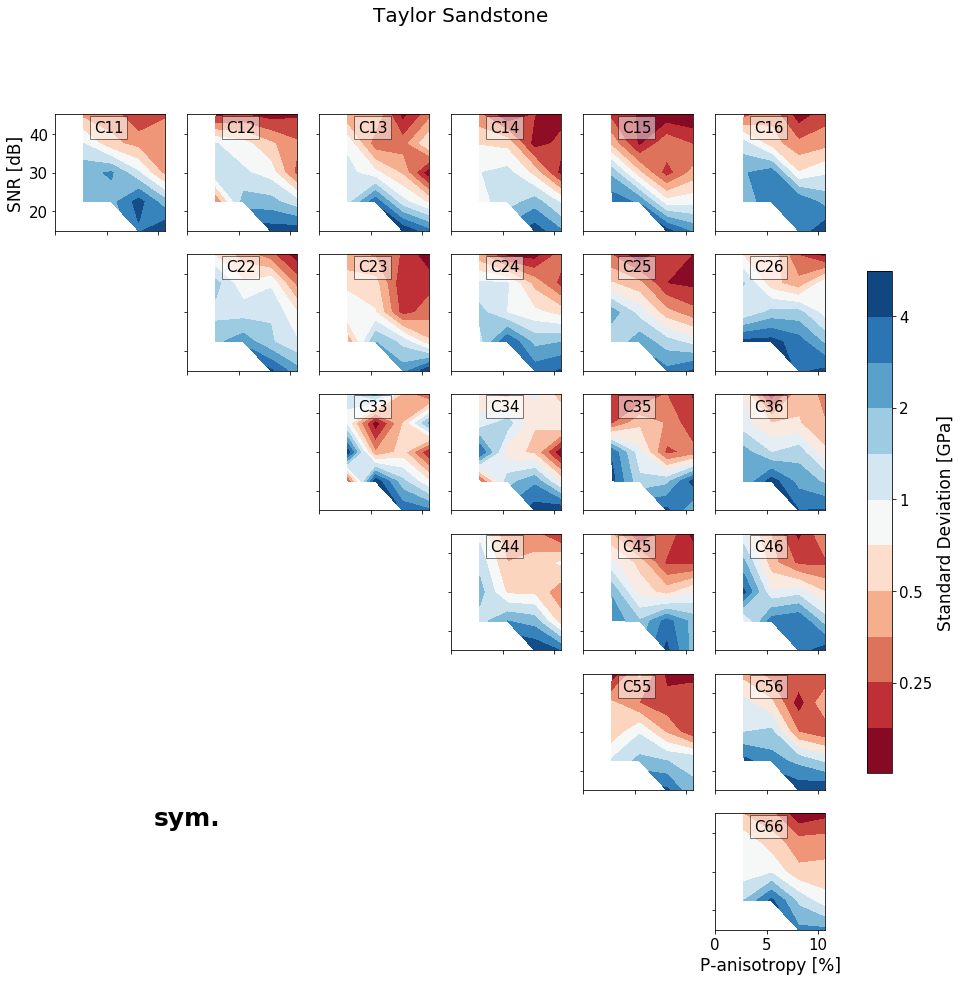

In [42]:
from scipy import interpolate

sig = np.zeros((Ndb,Nc,6,6))
sigs = []
maxval = 10.                
for i in range(Ndb):
    for j in range(Nc):
        for k in range(6):
            for l in range(6):
                varlist = []
                for m in range(Ninv):
                    if C_e[i,j,m,k,l]==0.:
                        pass
                    else:
                        varlist.append(C_e[i,j,m,k,l])
                if len(varlist)<=2:
                    sig[i,j,k,l] = np.nan
                else:    
                    varlist.sort()
                    sig[i,j,k,l] = np.sqrt(np.var(varlist[1:len(varlist)-1]))*1e-9
                if sig[i,j,k,l]>=maxval:
                    sig[i,j,k,l] = maxval

                if sig[i,j,k,l]!=0.0 and not np.isnan(sig[i,j,k,l]):
                    sigs.append(sig[i,j,k,l])

vmin = min(sigs)
vmax = max(sigs)

param = [['C11','C12','C13','C14','C15','C16'],\
         ['C00','C22','C23','C24','C25','C26'],\
         ['C00','C00','C33','C34','C35','C36'],\
         ['C00','C00','C00','C44','C45','C46'],\
         ['C00','C00','C00','C00','C55','C56'],\
         ['C00','C00','C00','C00','C00','C66']]
                

#norm = colors.Normalize(vmin=vmin, vmax=vmax)
fig, ax = plt.subplots(ncols=6,nrows=6,figsize=(15,15),sharex=True,sharey=True)
#fig.suptitle('Standard Deviation as a function of Degree of anisotropy and Signal-to-Noise Ratio',fontsize=20)
fig.suptitle('Taylor Sandstone', fontsize=20)
dist_master = 0.
for i in range(6):
    for j in range(6):
        if i<=j:
            z = sig[:,:,i,j]      
            z = np.log10(z)
            array = np.ma.masked_invalid(z)
            xx, yy = np.meshgrid(anis, SNR_dB_u)
            #get only the valid values, interpolate missing data
            x1 = xx[~array.mask]
            y1 = yy[~array.mask]
            newarr = z[~array.mask]

            znew = interpolate.griddata((x1, y1), newarr.ravel(),
                                      (xx, yy),
                                         method='cubic')
            try:
                dist = np.max(znew[znew>0.])-np.min(znew[znew>0.])
            except:
                dist = 0
            cs = ax[i,j].contourf(xx, yy, znew,10,cmap='RdBu')
            if dist>dist_master:
                dist_master = dist
                cs1 = cs    
            #ax[i,j].contour(cs, colors='k',linewidths=1.)
            ax[i,j].text(0.35,0.85,param[i][j],transform = ax[i,j].transAxes,fontsize=15,bbox=dict(facecolor='white', alpha=.5))
        else:
            ax[i,j].set_axis_off()
            if i==5 and j==0:
                    ax[i,j].text(0.9,0.9,'sym.',weight='bold',transform = ax[i,j].transAxes,fontsize=25)     

cb = fig.colorbar(cs1,ax=ax, orientation='vertical', fraction=0.03,norm=matplotlib.colors.LogNorm())
cb.set_label(label='Standard Deviation [GPa]',fontsize=17)
cb.ax.tick_params(labelsize=15)
cb.set_ticks([-0.6022,-0.3011,0.,0.3011,0.6022,1.])
cb.set_ticklabels(['0.25','0.5','1','2','4','10'])
ax[5,5].set_xlabel('P-anisotropy [%]',fontsize=17) 
ax[0,0].set_ylabel('SNR [dB]',fontsize=17)
#ax[5,5].set_xticks(ticks=[6,10,15,20,25,30])
ax[0,0].set_yticks(ticks=[20,30,40])
ax[5,5].tick_params(labelsize=15)
ax[0,0].tick_params(labelsize=15)
#plt.savefig('TaylorSandstone_anisdegree_Noise_plot_log.png')            
plt.show()

#### 7C-inversion histogram

In [43]:
C, density = get_specific_VTI(medium[1])

ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


In [44]:
f = 15.
fs = 100.
SNR_dB_u = 20.
SNR_dB_r = 20.
SNR_dB_s = 20.
N = 25
Ninv = 50

ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

C_e = np.zeros((Ninv,6,6))
C_e2 = np.zeros((Ninv,6,6))
r2d = 180/np.pi
mode = 'triclinic'
sucinv = 0
for k in range(0,Ninv):
    nus, gammas = get_direction('random',C,N)
    d = np.array([])
    d2 = np.array([])
    G = np.array([])
    G2 = np.array([])
    count = 0
    count2 = 0
    for i in range(0,N):
        vel_e = np.zeros(4)
        vel_w = np.zeros(4)
        
        vel,v = get_eigenvals(gammas[i], density)
        seis, t = get_seis_strain(v, vel, nus[i], f, fs)
        seis = make_some_noise(seis,SNR_dB_u,SNR_dB_r,SNR_dB_s=SNR_dB_s)
        seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
        n_trans = get_polarizations(seis,'nav')
        nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=True)
        if type(nu_e)==bool:
            nu_e = n_trans[0]
            
        velests = estimate_velocities_noise(seis,nu_e,f,fs)
        for j in range(4):
            vel_e[j] = velests[j,0]
            vel_w[j] = velests[j,1]
        
        if vel_w[3]>0. and vel_e[3]<3*vel_e[1]:
            count += 1 
            vels = np.array([vel_e[3],vel_e[1],vel_e[2]])
            d,G = add_new_data(mode,d,G,nu_e,vels,n_trans,density)
        if vel_w[0]>0. and vel_e[0]<3*vel_e[1]:
            count2 += 1 
            vels2 = np.array([vel_e[0],vel_e[1],vel_e[2]])
            d2,G2 = add_new_data(mode,d2,G2,nu_e,vels2,n_trans,density)
            

    if count>=6:
        sucinv += 1 
        Q = np.linalg.inv(np.dot(G.transpose(),G)) 
        m = np.dot(np.dot(Q,G.transpose()),d)
        C_e[k,:,:] = sort_elastic_coeff(mode,m) 
        if np.sum(C_e[k,:,:]**2)*1e-18>1e5:
            sucinv -= 1
            print('strain','index '+str(k)+' failed')
            C_e[k,:,:] = np.zeros((6,6))
    if count2>=6:
        sucinv += 1 
        Q = np.linalg.inv(np.dot(G2.transpose(),G2)) 
        m = np.dot(np.dot(Q,G2.transpose()),d2)
        C_e2[k,:,:] = sort_elastic_coeff(mode,m) 
        if np.sum(C_e2[k,:,:]**2)*1e-18>1e5:
            sucinv -= 1
            print('rot','index '+str(k)+' failed')
            C_e2[k,:,:] = np.zeros((6,6))        
print(sucinv, 'successful inversions')

100 successful inversions


0 estimates stripped
0 estimates stripped


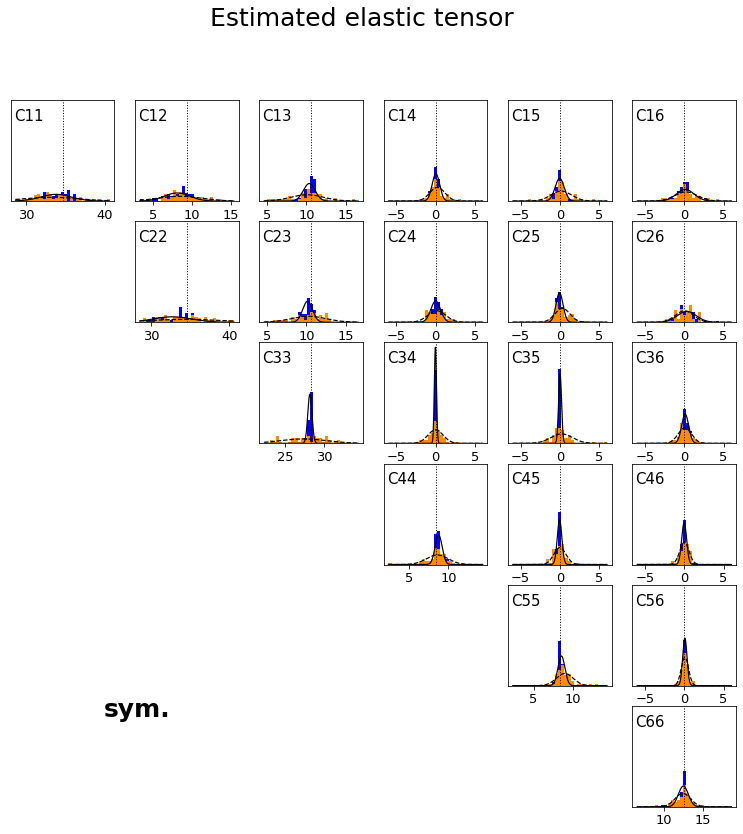

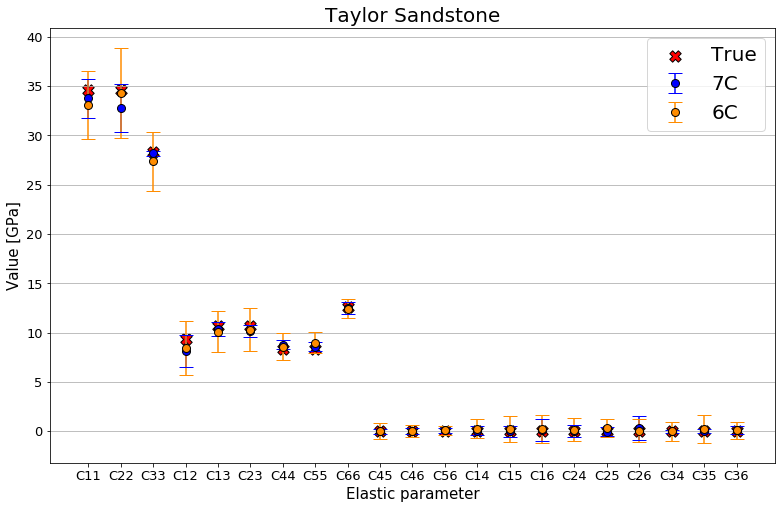

In [45]:
fac = 1e-9 ##conversion to GPa
width = 6.
Nplot = 1000
nbins = 31
save = False
savename = 'Taylor_Sandstone_7C'

param = [['C11','C12','C13','C14','C15','C16'],\
         ['C00','C22','C23','C24','C25','C26'],\
         ['C00','C00','C33','C34','C35','C36'],\
         ['C00','C00','C00','C44','C45','C46'],\
         ['C00','C00','C00','C00','C55','C56'],\
         ['C00','C00','C00','C00','C00','C66']]

fig, ax = plt.subplots(ncols=6,nrows=6, figsize=(13,13),sharey=True)
fig.suptitle('Estimated elastic tensor',fontsize=25)

width *= 1e9*fac
    # get rid of potential 'nan' in estimations
i1, i2, i3 = np.shape(C_e)
C_e_stripped = []
for i in range(i1):
    c = 0
    for j in range(i2):
        for k in range(i3):
            if not np.isnan(C_e[i,j,k]) and not C_e[i,j,k]==0.0: c+=1
    if c==36:
        C_e_stripped.append(C_e[i,:,:])
print(str(Ninv - np.shape(C_e_stripped)[0])+' estimates stripped')
C_e_stripped = np.array(C_e_stripped)

i1, i2, i3 = np.shape(C_e2)
C_e2_stripped = []
for i in range(i1):
    c = 0
    for j in range(i2):
        for k in range(i3):
            if not np.isnan(C_e2[i,j,k]) and not C_e2[i,j,k]==0.0: c+=1
    if c==36:
        C_e2_stripped.append(C_e2[i,:,:])
print(str(Ninv - np.shape(C_e2_stripped)[0])+' estimates stripped')
C_e2_stripped = np.array(C_e2_stripped)

mu = np.zeros((6,6))
sig = np.zeros((6,6))
for i in range(0,6):
    for j in range(i,6):
        #C_e_stripped[:,i,j].sort()
        n = len(C_e_stripped[:,i,j])
        mu[i,j] = 1/n * np.sum(C_e_stripped[:,i,j]*fac) 
        sig[i,j] = 1/n * np.sum((C_e_stripped[:,i,j]*fac-mu[i,j])**2)

mu2 = np.zeros((6,6))
sig2 = np.zeros((6,6))
for i in range(0,6):
    for j in range(i,6):
        #C_e2_stripped[:,i,j].sort()
        n = len(C_e2_stripped[:,i,j])
        mu2[i,j] = 1/n* np.sum(C_e2_stripped[:,i,j]*fac) 
        sig2[i,j] = 1/n * np.sum((C_e2_stripped[:,i,j]*fac-mu2[i,j])**2)
        

for i in range(0,6):
    for j in range(0,6):
        if i<=j:
            hist_range = [C[i,j]*fac-width,C[i,j]*fac+width]
            x = np.linspace(hist_range[0],hist_range[1],Nplot)
            y = 1/np.sqrt(2*np.pi*sig[i,j])*np.e**(-1/(2*sig[i,j])*(x-mu[i,j])**2)
            y2 = 1/np.sqrt(2*np.pi*sig2[i,j])*np.e**(-1/(2*sig2[i,j])*(x-mu2[i,j])**2)
            ax[i,j].hist(C_e_stripped[:,i,j]*fac,bins=nbins,color='blue',density=True, range=hist_range)
            ax[i,j].hist(C_e2_stripped[:,i,j]*fac,bins=nbins,color='darkorange',density=True, range=hist_range)
            ax[i,j].set_yticks([])
            ax[i,j].tick_params(labelsize=13)
            ax[i,j].axvline(C[i,j]*fac,linestyle='dotted',c='black',linewidth=1.)
            #ax[i,j].axvline(mu[i,j],linestyle='dashed',c='black')
            #ax[i,j].axvline(mu2[i,j],linestyle='dashed',c='black')
            ax[i,j].plot(x,y,color='black',linestyle='solid',linewidth=1.2)
            ax[i,j].plot(x,y2,color='black',linestyle='dashed',linewidth=1.2)
            ax[i,j].text(0.03,0.8,param[i][j],transform = ax[i,j].transAxes,fontsize=15)
        else:
            ax[i,j].set_axis_off()
            if i==5 and j==0:
                ax[i,j].text(0.9,0.9,'sym.',weight='bold',transform = ax[i,j].transAxes,fontsize=25)
if save:
    plt.savefig(savename+'_tri.png')
plt.plot()
    
param = ['C11','C22','C33','C12','C13','C23','C44','C55','C66','C45','C46','C56','C14','C15','C16','C24',\
         'C25','C26','C34','C35','C36']
c_true = np.array([C[0,0],C[1,1],C[2,2],C[0,1],C[0,2],C[1,2],C[3,3],C[4,4],C[5,5],C[3,4],C[3,5],C[4,5],C[0,3],C[0,4],\
              C[0,5],C[1,3],C[1,4],C[1,5],C[2,3],C[2,4],C[2,5]])*1e-9
c_est = np.array([mu[0,0],mu[1,1],mu[2,2],mu[0,1],mu[0,2],mu[1,2],mu[3,3],mu[4,4],mu[5,5],mu[3,4],\
             mu[3,5],mu[4,5],mu[0,3],mu[0,4],mu[0,5],mu[1,3],mu[1,4],mu[1,5],mu[2,3],mu[2,4],\
             mu[2,5]])
c_err = np.sqrt(np.array([sig[0,0],sig[1,1],sig[2,2],sig[0,1],sig[0,2],sig[1,2],sig[3,3],sig[4,4],sig[5,5],sig[3,4],\
             sig[3,5],sig[4,5],sig[0,3],sig[0,4],sig[0,5],sig[1,3],sig[1,4],sig[1,5],sig[2,3],sig[2,4],\
             sig[2,5]]))
c_est2 = np.array([mu2[0,0],mu2[1,1],mu2[2,2],mu2[0,1],mu2[0,2],mu2[1,2],mu2[3,3],mu2[4,4],mu2[5,5],mu2[3,4],\
             mu2[3,5],mu2[4,5],mu2[0,3],mu2[0,4],mu2[0,5],mu2[1,3],mu2[1,4],mu2[1,5],mu2[2,3],mu2[2,4],\
             mu2[2,5]])
c_err2 = np.sqrt(np.array([sig2[0,0],sig2[1,1],sig2[2,2],sig2[0,1],sig2[0,2],sig2[1,2],sig2[3,3],sig2[4,4],sig2[5,5],sig2[3,4],\
             sig2[3,5],sig2[4,5],sig2[0,3],sig2[0,4],sig2[0,5],sig2[1,3],sig2[1,4],sig2[1,5],sig2[2,3],sig2[2,4],\
             sig2[2,5]]))

plt.figure(figsize=(13,8))
plt.title('Taylor Sandstone', fontsize=20)
plt.errorbar(param,c_est,yerr=c_err,label='7C',color='blue',fmt='o',ms=8,capsize=7,mfc='blue',mec='black')
plt.errorbar(param,c_est2,yerr=c_err2,label='6C',color='darkorange',fmt='o',ms=8,capsize=7,mfc='darkorange',mec='black')
plt.scatter(param,c_true,color='red',marker='X',label='True',s=130,edgecolors='black')
plt.grid(axis='y')
plt.xlabel('Elastic parameter',fontsize=15)
plt.ylabel('Value [GPa]',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc=1,fontsize=20)
if save:
    plt.savefig(savename+'_err.png')
plt.show()

#### Bedding plots, 6C and 7C

In [46]:
C, density = get_specific_VTI(medium[1],give_thomsen=True)

taylor sandstone
 
vp0     = 3368
vs0     = 1829
eps     = 0.11
delta   = -0.035
gamma   = 0.255
density = 2500
 
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]


successful 10 - strain 1 - rot inversions


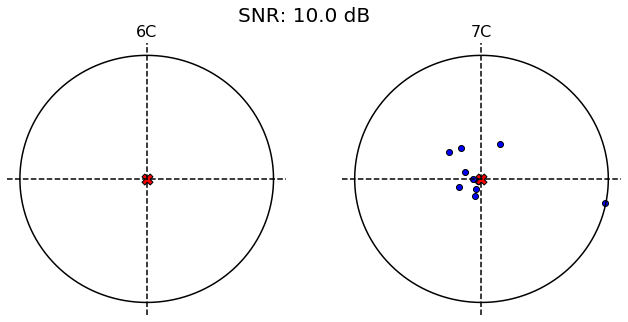

successful 10 - strain 10 - rot inversions


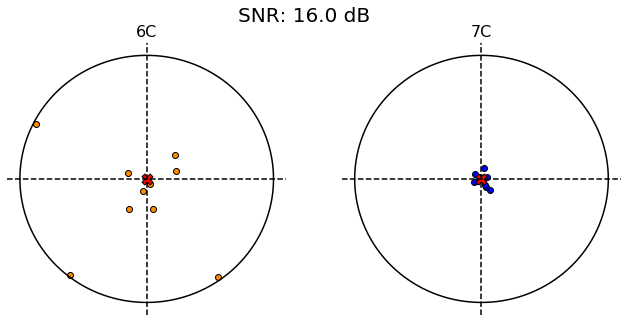

successful 10 - strain 10 - rot inversions


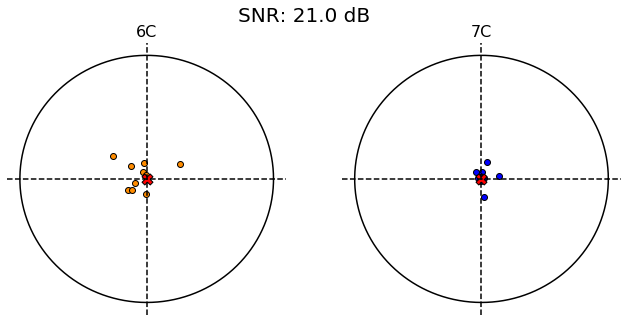

successful 10 - strain 10 - rot inversions


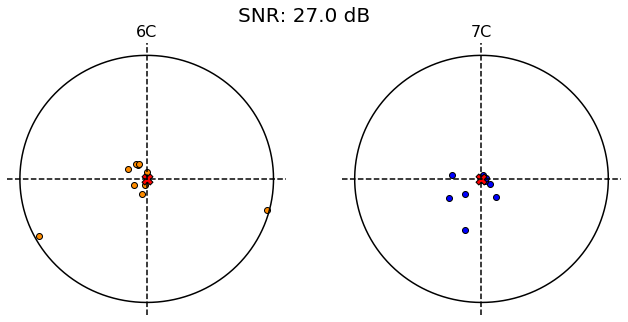

successful 10 - strain 10 - rot inversions


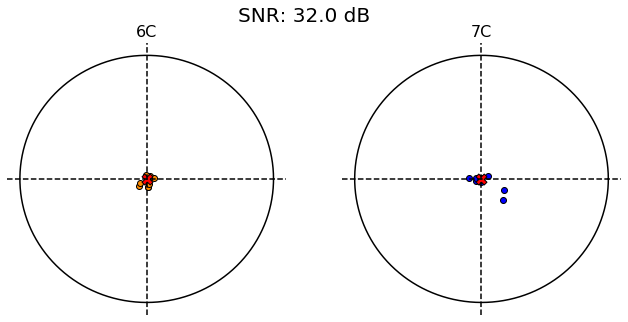

successful 10 - strain 10 - rot inversions


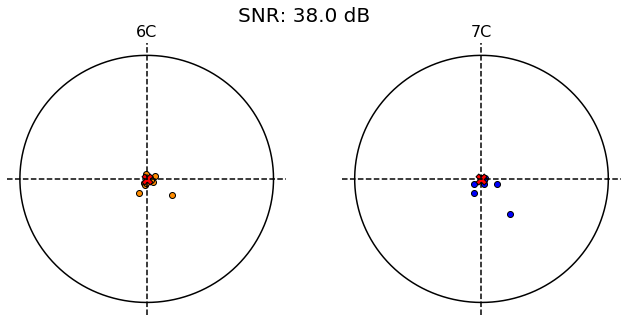

successful 10 - strain 10 - rot inversions


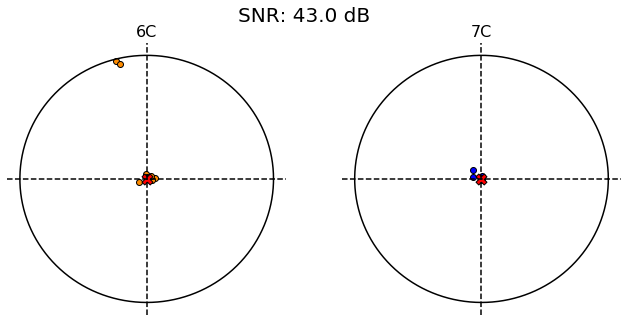

successful 10 - strain 10 - rot inversions


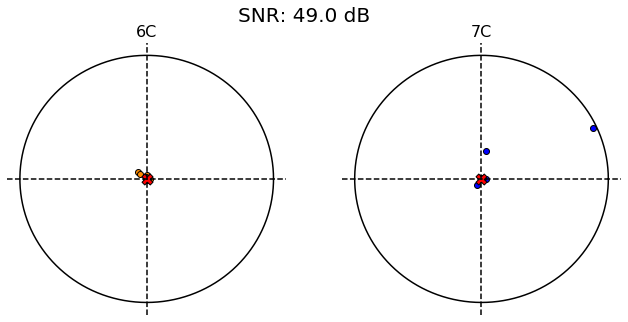

successful 10 - strain 10 - rot inversions


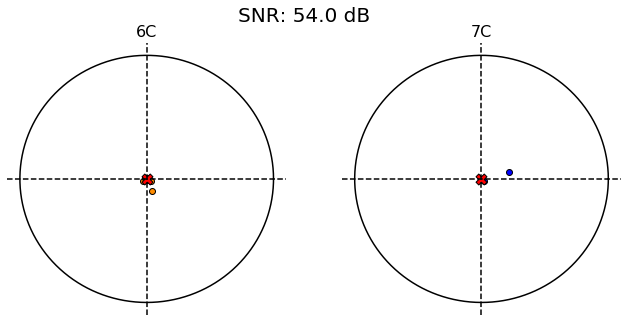

successful 10 - strain 10 - rot inversions


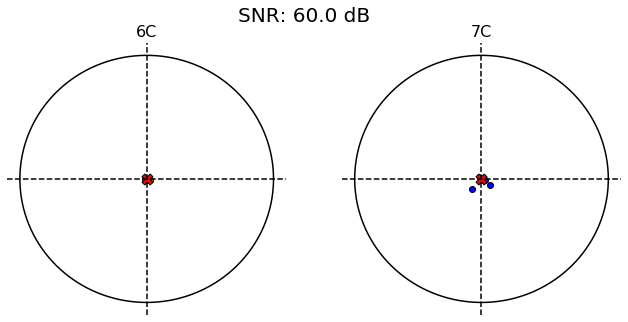

In [47]:
f = 15.
fs = 100.
Ndb = 10
SNR_dB_u = np.linspace(10.,60.,Ndb)
SNR_dB_r = np.linspace(10.,60.,Ndb)
SNR_dB_s = np.linspace(10.,60.,Ndb)
N = 25
Ninv = 10

ang1 = 0.
ang2 = 0.
ang3 = 0.

C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)

r2d = 180/np.pi
mode = 'triclinic'
angles = np.linspace(0,2*np.pi,1000)
x = np.cos(angles)
y = np.sin(angles)
tot_err = []
tot_err2 = []
for idb in range(Ndb):
    sucinv_s = 0
    sucinv_r = 0
    C_e = np.zeros((Ninv,6,6))
    C_e2 = np.zeros((Ninv,6,6))
    for k in range(0,Ninv):
        nus, gammas = get_direction('random',C,N)
        d = np.array([])
        d2 = np.array([])
        G = np.array([])
        G2 = np.array([])
        count = 0
        count2 = 0
        for i in range(0,N):
            vel,v = get_eigenvals(gammas[i], density)
            seis, t = get_seis_strain(v, vel, nus[i], f, fs)
            seis = make_some_noise(seis,SNR_dB_u[idb],SNR_dB_r[idb],SNR_dB_s=SNR_dB_s[idb])
            seis = np.array([seis[0,:],seis[1,:],seis[2,:],seis[3,:],seis[4,:],seis[5,:],seis[8,:]])
            nt = len(seis[0,:])
            n_trans = get_polarizations(seis,'nav')
            nu_e = get_propagation_direction(seis,f,fs,switchoption=True,control_fac=0.5,turnoffp=True)
            if type(nu_e)==bool:
                nu_e = n_trans[0]
                
            vel_e = np.zeros(4)
            vel_w = np.zeros(4)

            velests = estimate_velocities_noise(seis,nu_e,f,fs)
            for j in range(4):
                vel_e[j] = velests[j,0]
                vel_w[j] = velests[j,1]

            if vel_w[3]>0. and vel_e[3]<3*vel_e[1]: #strain
                count += 1 
                vels = np.array([vel_e[3],vel_e[1],vel_e[2]])
                d,G = add_new_data(mode,d,G,nu_e,vels,n_trans,density)
                
            if vel_w[0]>0. and vel_e[0]<3*vel_e[1]: #rot
                count2 += 1 
                vels2 = np.array([vel_e[0],vel_e[1],vel_e[2]])
                d2,G2 = add_new_data(mode,d2,G2,nu_e,vels2,n_trans,density)


        if count>=6:
            sucinv_s += 1 
            Q = np.linalg.inv(np.dot(G.transpose(),G)) 
            m = np.dot(np.dot(Q,G.transpose()),d)
            C_e[k,:,:] = sort_elastic_coeff(mode,m) 
            if np.sum(C_e[k,:,:]**2)*1e-18>1e5:
                print('strain','index '+str(k)+' failed')
                C_e[k,:,:] = np.zeros((6,6))
                sucinv_s -= 1
        if count2>=6:
            sucinv_r += 1 
            Q = np.linalg.inv(np.dot(G2.transpose(),G2)) 
            m = np.dot(np.dot(Q,G2.transpose()),d2)
            C_e2[k,:,:] = sort_elastic_coeff(mode,m) 
            if np.sum(C_e2[k,:,:]**2)*1e-18>1e5:
                print('rot','index '+str(k)+' failed')
                C_e2[k,:,:] = np.zeros((6,6))  
                sucinv_r -= 1
    print('successful',sucinv_s,'- strain',sucinv_r,'- rot','inversions')
    d2r = np.pi/180
    bedding = np.zeros((Ninv,3))
    real = np.zeros(3)
    real[0] = -np.cos(-ang1*d2r)*np.sin(-ang2*d2r)*np.cos(-ang3*d2r)-np.sin(-ang1*d2r)*np.sin(-ang3*d2r)
    real[1] = np.cos(-ang1*d2r)*np.sin(-ang2*d2r)*np.sin(-ang3*d2r)-np.sin(-ang1*d2r)*np.cos(-ang3*d2r)
    real[2] = np.cos(-ang1*d2r)*np.cos(-ang2*d2r)
    error = []
    
    fig, ax = plt.subplots(ncols=2,figsize=(11,5))
    for irot in range(0,Ninv):
        if np.sum(C_e[k,:,:]**2)==0.:
            bedding[irot,:] = np.nan
        else:
            try:
                Crot,g = getrotationVTI(C_e[irot,:,:])
                bedding[irot,:] = np.dot(g.transpose(),np.array([0,0,1]))
                if bedding[irot,2]<0.:
                    bedding[irot,:] *= -1.
                ax[1].scatter(bedding[irot,0],bedding[irot,1],color='blue',edgecolors='k')
                err = np.arccos(np.dot(bedding[irot,:],real))*180/np.pi
                if err>90.:
                    err = 90. - err
                error.append(err)

            except:
                pass
    error.sort()        
    tot_err.append(np.mean(error[1:len(error)-1]))
    ax[1].scatter(real[0],real[1],120,marker='X',color='red',edgecolors='k')
    ax[1].plot(x,y,color='black')
    ax[1].axvline(0,color='black',ls='--')
    ax[1].axhline(0,color='black',ls='--')
    ax[1].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_title('7C',fontsize=16)
    ax[1].set_axis_off()
    
    error = []
    bedding = np.zeros((Ninv,3))
    for irot in range(0,Ninv):
        if np.sum(C_e2[k,:,:]**2)==0.:
            bedding[irot,:] = np.nan
        else:
            try:
                Crot,g = getrotationVTI(C_e2[irot,:,:])
                bedding[irot,:] = np.dot(g.transpose(),np.array([0,0,1]))
                if bedding[irot,2]<0.:
                    bedding[irot,:] *= -1.
                ax[0].scatter(bedding[irot,0],bedding[irot,1],color='darkorange',edgecolors='k')
                err = np.arccos(np.dot(bedding[irot,:],real))*180/np.pi
                if err!=np.nan:  
                    if err>90.:
                        err = 90. - err
                    if err<70.:    
                        error.append(err)

            except:
                pass
    error.sort()        
    tot_err2.append(np.mean(error[1:len(error)-1]))       
    ax[0].scatter(real[0],real[1],120,marker='X',color='red',edgecolors='k')
    ax[0].plot(x,y,color='black')
    ax[0].axvline(0,color='black',ls='--')
    ax[0].axhline(0,color='black',ls='--')
    ax[0].set_yticks([])
    ax[0].set_xticks([])
    ax[0].set_title('6C',fontsize=16)
    ax[0].set_axis_off()
    fig.suptitle('SNR: '+str(round(SNR_dB_u[idb],0))+' dB',fontsize=20)
    #plt.savefig('bedding_Taylorsandstone_'+str(round(SNR_dB_u[idb],0))+'_2.png') 
    plt.show()

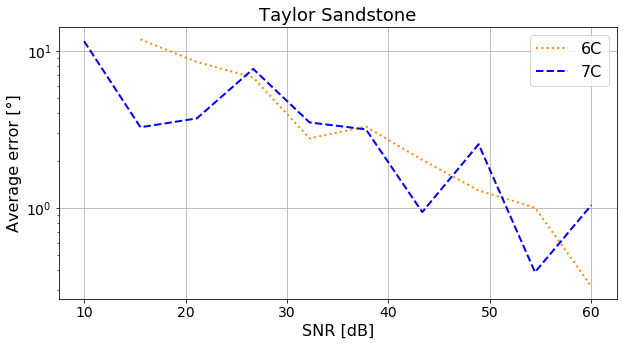

In [48]:
fig = plt.figure(figsize=(10,5))
smooth = np.zeros((len(tot_err)))
smooth[0] = tot_err[0]
for i in range(1,len(tot_err)):
    smooth[i] = .5*(tot_err[i]+tot_err[i-1])

smooth2 = np.zeros((len(tot_err2)))
smooth2[0] = tot_err2[0]
for i in range(1,len(tot_err2)):
    smooth2[i] = .5*(tot_err2[i]+tot_err2[i-1])    
    
plt.plot(SNR_dB_u,tot_err2,label='6C',c='darkorange',ls='dotted',lw=2)
plt.plot(SNR_dB_u,tot_err,label='7C',c='blue',ls='dashed',lw=2)
plt.yscale('log')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Taylor Sandstone',fontsize=18)
plt.xlabel('SNR [dB]',fontsize=16)
plt.ylabel('Average error [°]',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.grid()
#plt.savefig('bedding_convergence_Taylor_Sandstone_2_log.png')
plt.show()